In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

In [192]:
import warnings
warnings.filterwarnings("ignore")

###  importing the dataset:

In [193]:
toyota_cor=pd.read_csv("ToyotaCorolla.csv",engine='python')

In [194]:
toyota_cor.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [195]:
corolla=toyota_cor[(["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])]

In [196]:
toyota_cor.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [197]:
toyota_cor.shape

(1436, 38)

In [198]:
corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [199]:
corolla.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [200]:
corolla.shape

(1436, 9)

###  Data understanding and analysis:

### Initial analysis:

In [201]:
corolla.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [202]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


#### Checking for Missing or null values:

In [203]:
corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

###  Duplicate check:

In [204]:
corolla[corolla.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [205]:
corolla.drop_duplicates(inplace= True)

In [206]:
corolla[corolla.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


###  Outliers Check: Detection and Removal

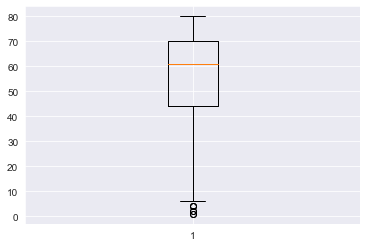

In [207]:
box1=plt.boxplot(x="Age_08_04",data=corolla)

In [208]:
[i.get_ydata() for i in box1["fliers"]]

[array([4, 4, 4, 2, 2, 1, 1], dtype=int64)]

In [209]:
corolla.index[(corolla["Age_08_04"]==4) | (corolla["Age_08_04"]==2 )|(corolla["Age_08_04"]==1)].tolist()

[109, 110, 111, 182, 183, 184, 185]

In [210]:
corolla.drop(corolla.index[[109, 110, 111, 182, 183, 184, 185]],axis=0,inplace=True)

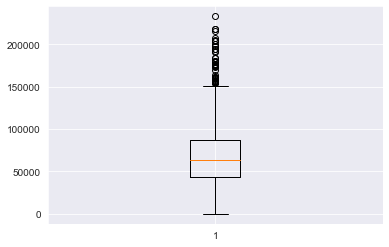

In [211]:
box2=plt.boxplot(x="KM",data=corolla)

In [212]:
[i.get_ydata() for i in box2["fliers"]]

[array([180638, 179860, 178858, 161000, 158320, 216000, 198167, 176000,
        174139, 174000, 205000, 204250, 194545, 190900, 183500, 176184,
        174833, 155720, 155500, 154783, 154462, 232940, 218118, 217764,
        207114, 203254, 200732, 197501, 194765, 191620, 183277, 180378,
        178800, 176177, 176000, 172980, 170000, 164000, 161775, 160000,
        159968, 159908, 158492, 156204, 156169, 155210, 155000, 154900],
       dtype=int64)]

In [213]:
arr=corolla.index[(corolla["KM"]>=154900)].tolist()

In [214]:
corolla.drop(corolla.index[arr],axis=0,inplace=True)

In [215]:
corolla.shape

(1382, 9)

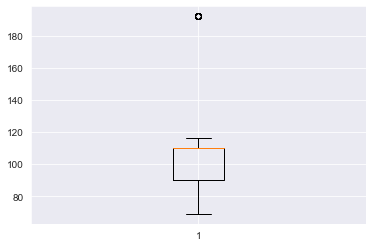

In [216]:
box3=plt.boxplot(x="HP",data=corolla)

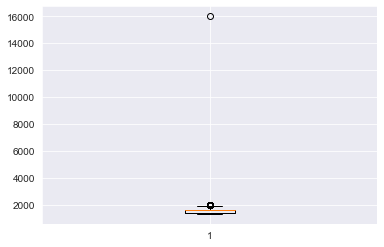

In [217]:
box4=plt.boxplot(x="cc",data=corolla)

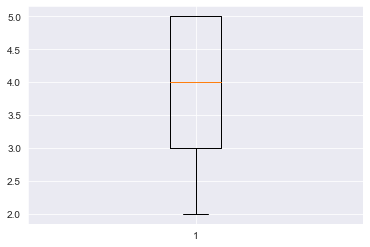

In [218]:
box5=plt.boxplot(x="Doors",data=corolla)

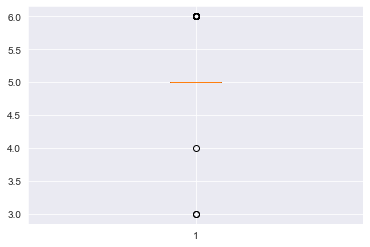

In [219]:
box6=plt.boxplot(x="Gears",data=corolla)

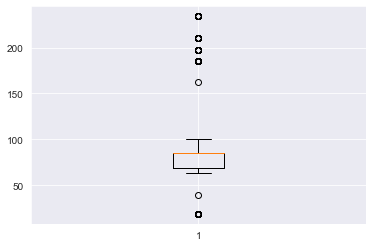

In [220]:
box7=plt.boxplot(x="Quarterly_Tax",data=corolla)

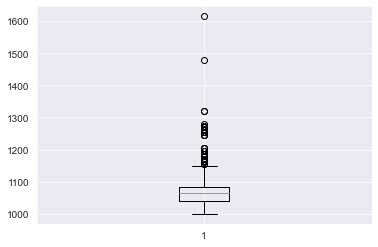

In [221]:
box8=plt.boxplot(x="Weight",data=corolla)

In [222]:
[i.get_ydata() for i in box8["fliers"]]

[array([1165, 1165, 1165, 1165, 1170, 1170, 1245, 1245, 1185, 1185, 1185,
        1185, 1185, 1185, 1185, 1185, 1170, 1255, 1255, 1270, 1255, 1255,
        1195, 1255, 1180, 1195, 1165, 1180, 1275, 1180, 1180, 1245, 1265,
        1260, 1260, 1260, 1155, 1320, 1270, 1280, 1270, 1255, 1275, 1255,
        1320, 1185, 1165, 1180, 1160, 1205, 1205, 1170, 1615, 1165, 1205,
        1165, 1260, 1260, 1155, 1480, 1172], dtype=int64)]

In [223]:
arr1=corolla.index[(corolla["Weight"]>=1155)].tolist()

In [224]:
corolla.drop(corolla.index[arr1],axis=0,inplace=True)

In [225]:
corolla.shape

(1321, 9)

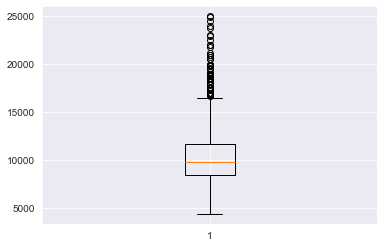

In [226]:
box9=plt.boxplot(x="Price",data=corolla)

In [227]:
[i.get_ydata() for i in box9["fliers"]]

[array([17950, 16750, 16950, 16950, 17495, 16950, 17950, 16750, 18750,
        17950, 17950, 16950, 18950, 18950, 19950, 16950, 18750, 18450,
        16895, 17250, 16650, 17450, 18900, 18750, 17450, 18990, 18500,
        18500, 16950, 18800, 17450, 17950, 24950, 22950, 24990, 17900,
        19950, 16950, 17950, 18450, 23000, 19900, 23950, 18500, 18950,
        20500, 24500, 19450, 20950, 19950, 18450, 19500, 21750, 16868,
        19500, 18900, 19750, 19750, 18950, 20750, 19600, 17650, 19950,
        19950, 20950, 20500, 17795, 18245, 23750, 19500, 18950, 21950,
        19950, 18950, 19950, 21950, 22500, 18500, 18700, 21125, 18950],
       dtype=int64)]

In [228]:
arr2=corolla.index[(corolla["Price"]>=17450)].tolist()

In [229]:
corolla.drop(corolla.index[arr2],axis=0,inplace=True)

In [230]:
corolla.shape

(1253, 9)

In [231]:
corolla=corolla.reset_index()

In [232]:
corolla.head()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,9,12950,23,71138,69,1900,3,5,185,1105
1,17,17950,24,21716,110,1600,3,5,85,1105
2,18,16750,24,25563,110,1600,3,5,19,1065
3,19,16950,30,64359,110,1600,3,5,85,1105
4,20,15950,30,67660,110,1600,3,5,85,1105


In [233]:
corolla.shape

(1253, 10)

In [234]:
corolla=corolla.drop(columns=["index"],axis=1)

In [235]:
corolla.shape

(1253, 9)

In [236]:
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12950,23,71138,69,1900,3,5,185,1105
1,17950,24,21716,110,1600,3,5,85,1105
2,16750,24,25563,110,1600,3,5,19,1065
3,16950,30,64359,110,1600,3,5,85,1105
4,15950,30,67660,110,1600,3,5,85,1105


####  Data Description:

In [237]:
corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,10210.928970,58.632083,67462.905028,101.389465,1545.073424,4.008779,5.023144,81.564246,1063.549082
std,2896.627055,16.501800,34387.303882,12.531492,170.196178,0.950409,0.183872,32.493180,37.444231
min,4350.000000,2.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8400.000000,50.000000,43632.000000,86.000000,1400.000000,3.000000,5.000000,69.000000,1035.000000
50%,9695.000000,62.000000,63634.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1060.000000
75%,11000.000000,71.000000,85565.000000,110.000000,1600.000000,5.000000,5.000000,85.000000,1075.000000
max,24500.000000,80.000000,232940.000000,192.000000,2000.000000,5.000000,6.000000,234.000000,1480.000000


## Assumption check:

###  1. Normality check:

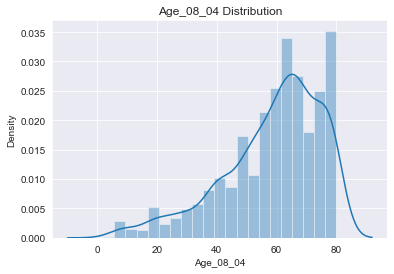

In [238]:
sns.distplot(a=corolla["Age_08_04"])
plt.title("Age_08_04 Distribution")
plt.show()

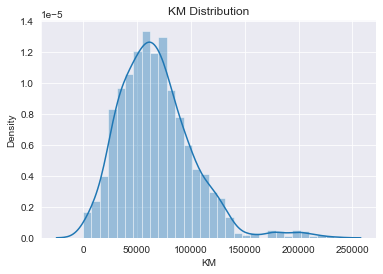

In [239]:
sns.distplot(a=corolla["KM"])
plt.title("KM Distribution")
plt.show()

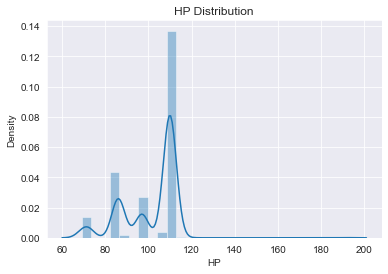

In [240]:
sns.distplot(a=corolla["HP"])
plt.title("HP Distribution")
plt.show()

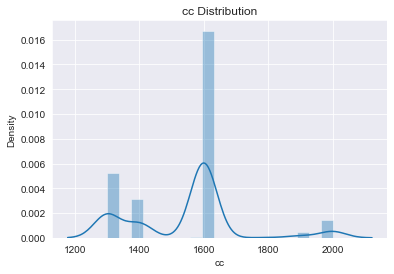

In [241]:
sns.distplot(a=corolla["cc"])
plt.title("cc Distribution")
plt.show()

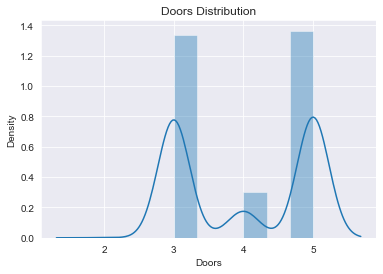

In [242]:
sns.distplot(a=corolla["Doors"])
plt.title("Doors Distribution")
plt.show()

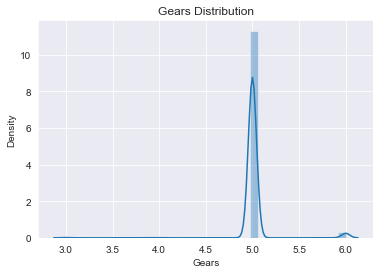

In [243]:
sns.distplot(a=corolla["Gears"])
plt.title("Gears Distribution")
plt.show()

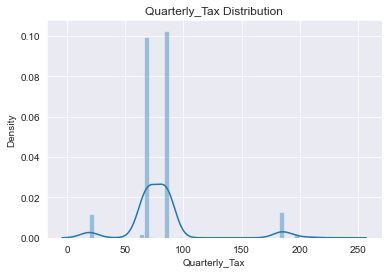

In [244]:
sns.distplot(a=corolla["Quarterly_Tax"])
plt.title("Quarterly_Tax Distribution")
plt.show()

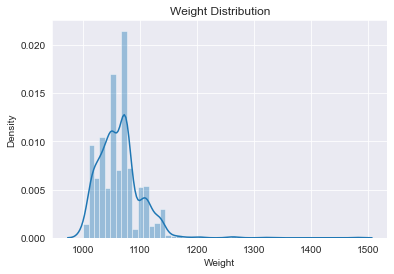

In [245]:
sns.distplot(a=corolla["Weight"])
plt.title("Weight Distribution")
plt.show()

###  Prob plot:

In [246]:
from scipy import stats

In [247]:
corolla.head(1)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12950,23,71138,69,1900,3,5,185,1105


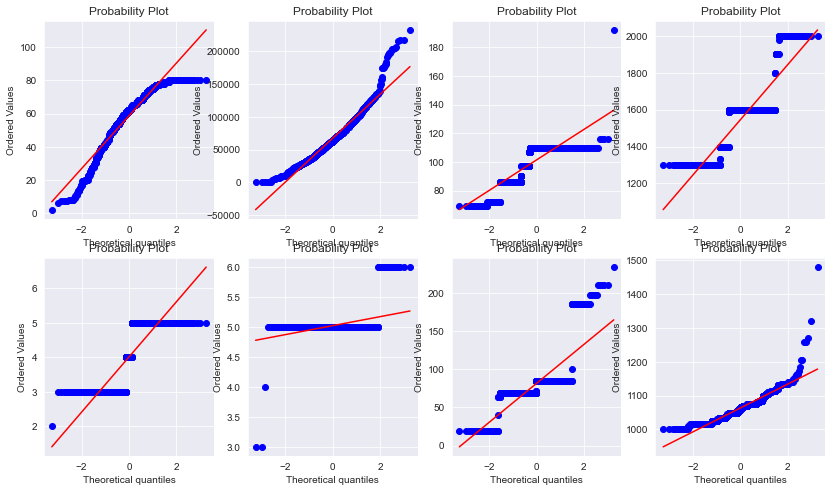

In [248]:
plt.figure(figsize=(14,8))
plt.subplot(2,4,1)
stats.probplot(x =corolla["Age_08_04"],dist='norm',plot=plt)
plt.subplot(2,4,2)
stats.probplot(x =corolla["KM"],dist='norm',plot=plt)
plt.subplot(2,4,3)
stats.probplot(x =corolla["HP"],dist='norm',plot=plt)
plt.subplot(2,4,4)
stats.probplot(x =corolla["cc"],dist='norm',plot=plt)
plt.subplot(2,4,5)
stats.probplot(x =corolla["Doors"],dist='norm',plot=plt)
plt.subplot(2,4,6)
stats.probplot(x =corolla["Gears"],dist='norm',plot=plt)
plt.subplot(2,4,7)
stats.probplot(x =corolla["Quarterly_Tax"],dist='norm',plot=plt)
plt.subplot(2,4,8)
stats.probplot(x =corolla["Weight"],dist='norm',plot=plt)
plt.show()

###  Linearity Test:

In [249]:
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12950,23,71138,69,1900,3,5,185,1105
1,17950,24,21716,110,1600,3,5,85,1105
2,16750,24,25563,110,1600,3,5,19,1065
3,16950,30,64359,110,1600,3,5,85,1105
4,15950,30,67660,110,1600,3,5,85,1105


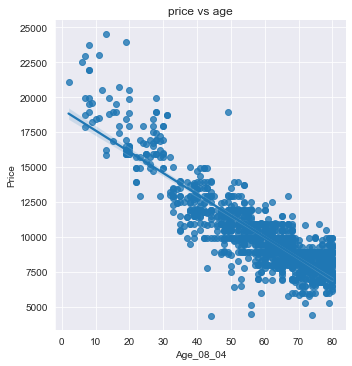

In [250]:
sns.lmplot(x='Age_08_04',y='Price',data=corolla)
plt.title("price vs age")
plt.show()

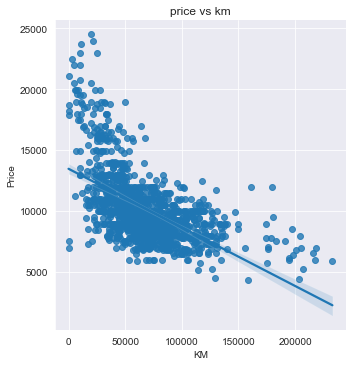

In [251]:
sns.lmplot(x='KM',y='Price',data=corolla)
plt.title("price vs km")
plt.show()

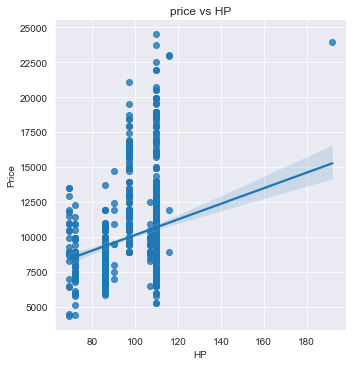

In [252]:
sns.lmplot(x='HP',y='Price',data=corolla)
plt.title("price vs HP")
plt.show()

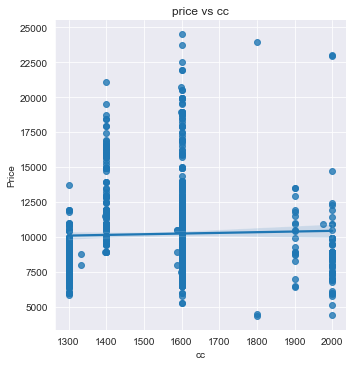

In [253]:
sns.lmplot(x='cc',y='Price',data=corolla)
plt.title("price vs cc")
plt.show()

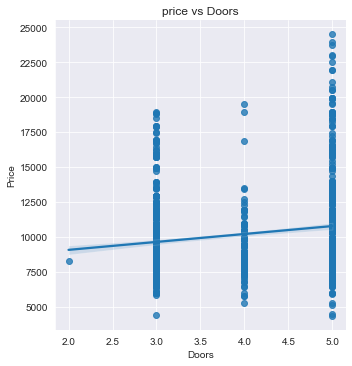

In [254]:
sns.lmplot(x='Doors',y='Price',data=corolla)
plt.title("price vs Doors")
plt.show()

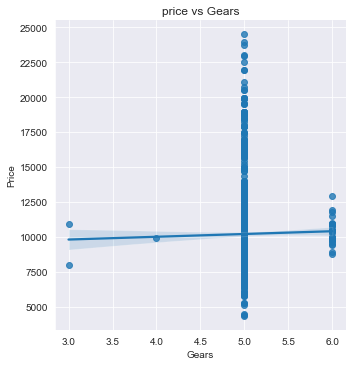

In [255]:
sns.lmplot(x='Gears',y='Price',data=corolla)
plt.title("price vs Gears")
plt.show()

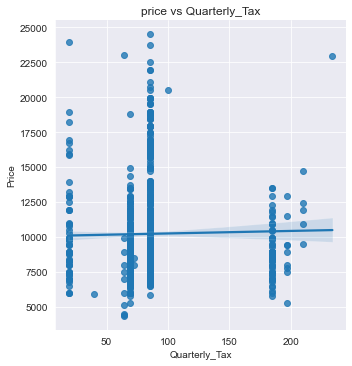

In [256]:
sns.lmplot(x='Quarterly_Tax',y='Price',data=corolla)
plt.title("price vs Quarterly_Tax")
plt.show()

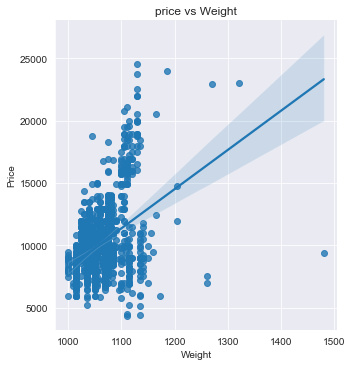

In [257]:
sns.lmplot(x='Weight',y='Price',data=corolla)
plt.title("price vs Weight")
plt.show()

###  Points: 

###   we need to transform the data to achieve bettter linearity:

###  Multi-colinearity test:

###  Correlation Matrix:

In [258]:
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.867642,-0.571741,0.241667,0.028612,0.186555,0.012624,0.020303,0.406899
Age_08_04,-0.867642,1.000000,0.488463,-0.096748,-0.028281,-0.120849,0.020182,-0.068927,-0.347573
KM,-0.571741,0.488463,1.000000,-0.280863,0.326609,-0.022970,0.032537,0.352284,0.058383
HP,0.241667,-0.096748,-0.280863,1.000000,0.146933,0.133436,0.069919,-0.362200,0.062436
cc,0.028612,-0.028281,0.326609,0.146933,1.000000,0.143904,0.025341,0.602102,0.643029
Doors,0.186555,-0.120849,-0.022970,0.133436,0.143904,1.000000,-0.151992,0.121813,0.383432
Gears,0.012624,0.020182,0.032537,0.069919,0.025341,-0.151992,1.000000,0.003695,-0.026789
Quarterly_Tax,0.020303,-0.068927,0.352284,-0.362200,0.602102,0.121813,0.003695,1.000000,0.471565
Weight,0.406899,-0.347573,0.058383,0.062436,0.643029,0.383432,-0.026789,0.471565,1.000000


###  Heatmap:

<AxesSubplot:>

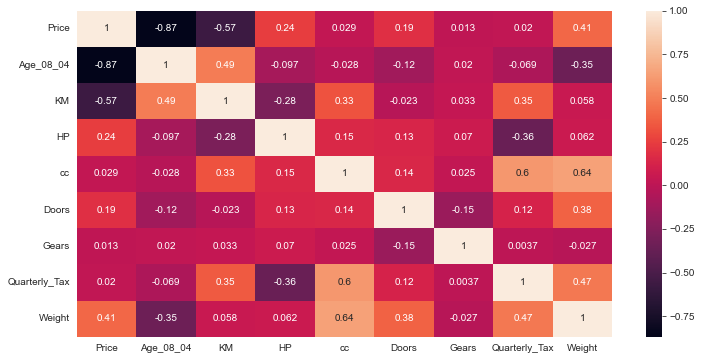

In [259]:
plt.figure(figsize=(12,6))
sns.heatmap(corolla.corr(),annot=True)

##   Scatterplot between variables along with histograms:

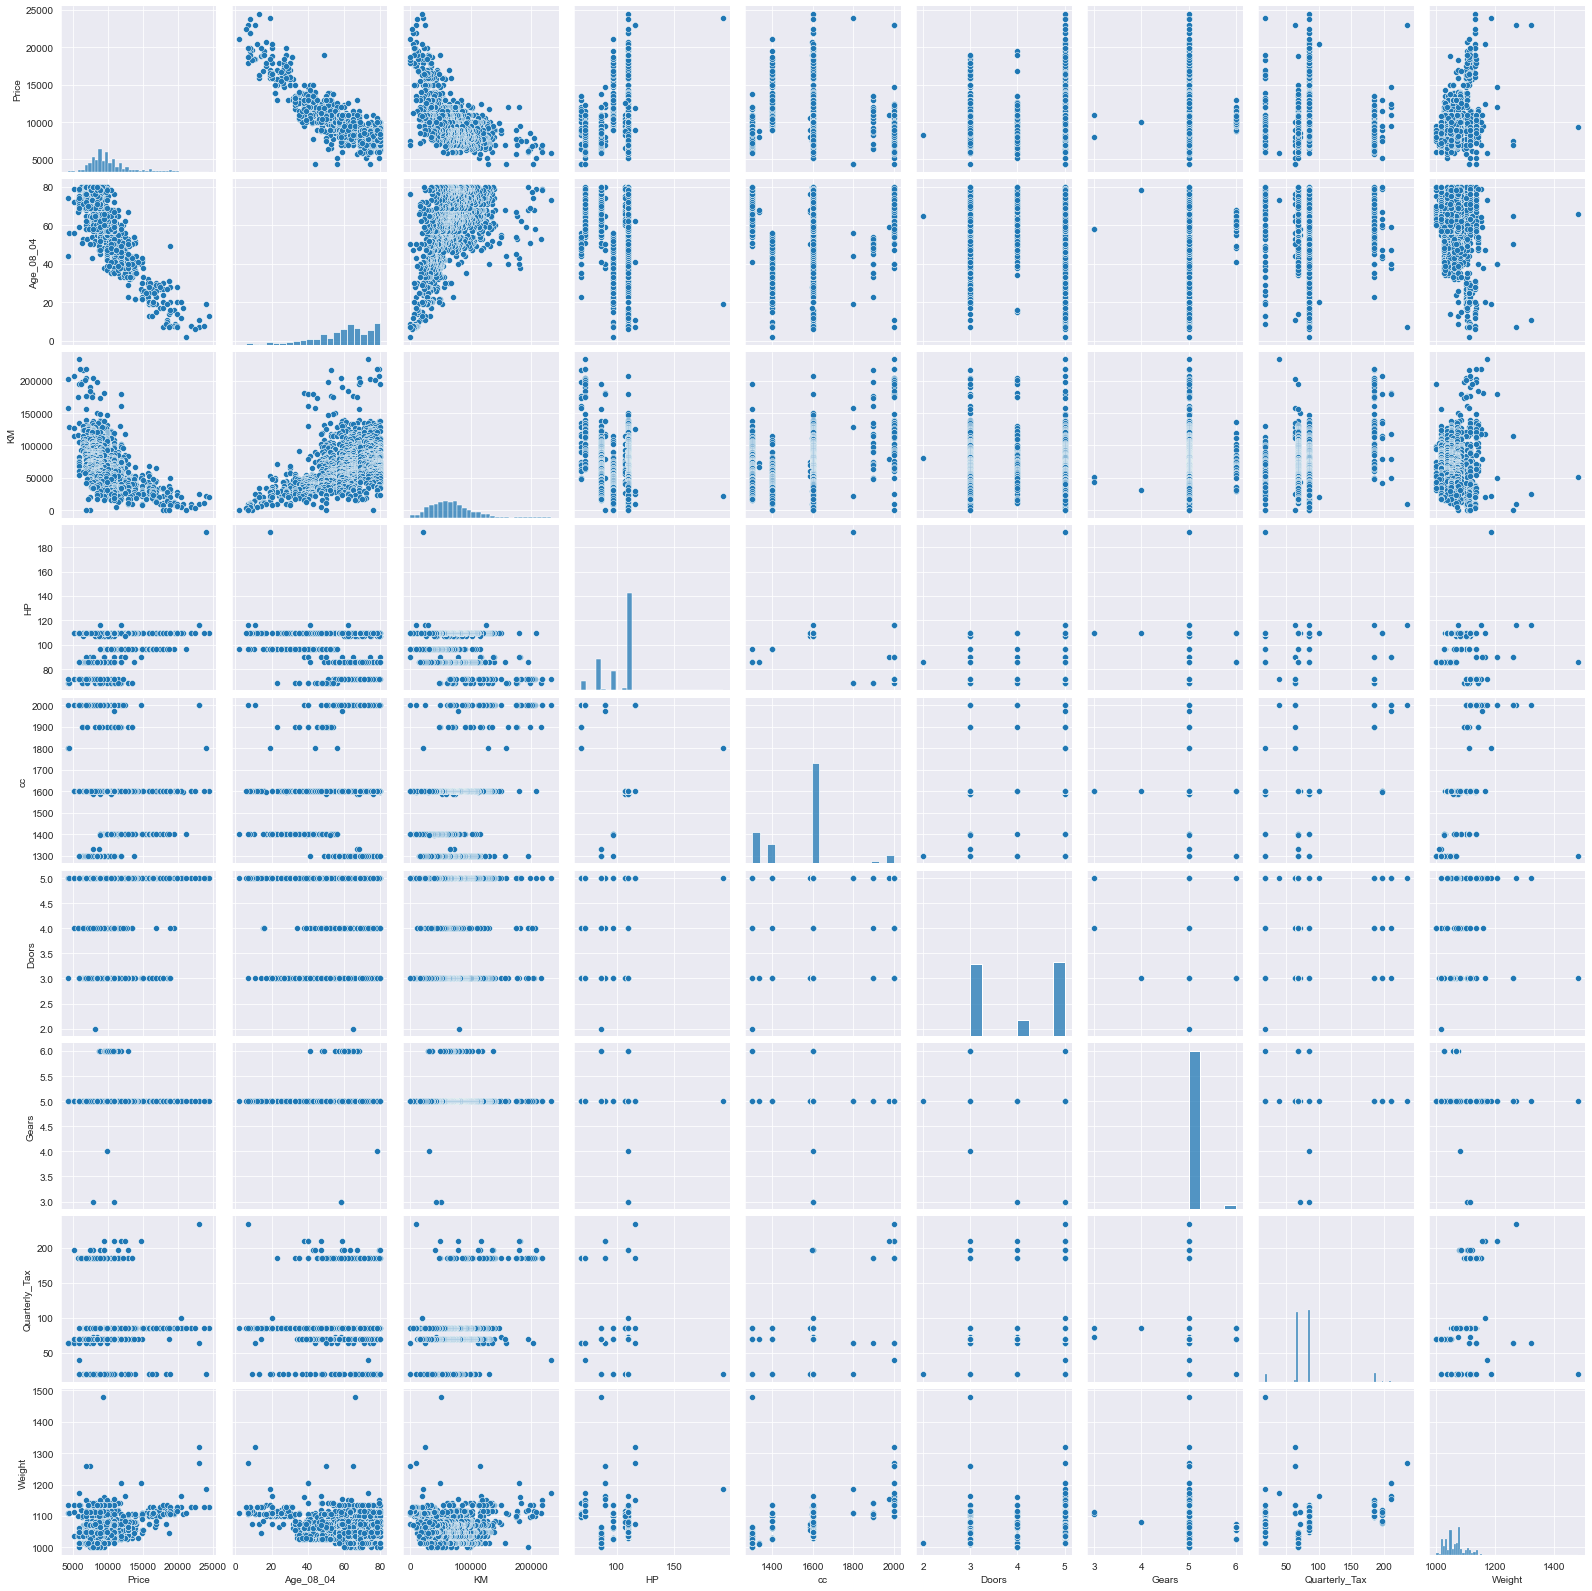

In [260]:
sns.set_style(style='darkgrid')
sns.pairplot(corolla)

###  Checking for Imbalanced data set:

In [261]:
corolla['Price']

0       12950
1       17950
2       16750
3       16950
4       15950
        ...  
1248     7500
1249    10845
1250     8500
1251     7250
1252     6950
Name: Price, Length: 1253, dtype: int64

###  hist plot:

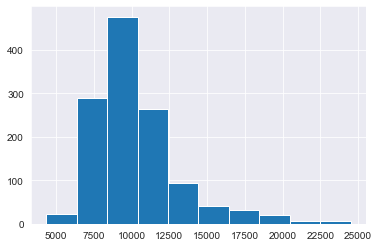

In [262]:
plt.hist(x='Price',data=corolla)
plt.show()

## Transformation:

###  1. Model building with Original data:

###  Data preparation:

###  Train-test split:

In [263]:
x=corolla.drop(labels='Price',axis=1)
y=corolla[['Price']]

In [264]:
[x.shape,y.shape]

[(1253, 8), (1253, 1)]

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=None)

In [267]:
x_train.shape,y_train.shape

((877, 8), (877, 1))

In [268]:
x_test.shape,y_test.shape

((376, 8), (376, 1))

###   Model Building || Model Training:

In [269]:
from sklearn.linear_model import LinearRegression

In [270]:
model = LinearRegression()


In [271]:
model.fit(x_train,y_train)

LinearRegression()

###  Model prediction:

In [272]:
y_train_pred=model.predict(x_train)

### Model evaluation:

In [273]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,accuracy_score

####  Rsquared value:

In [274]:
print("Rsquare value:",r2_score(y_train,y_train_pred))

Rsquare value: 0.8257580197877782


###  Test data:

#### prediction:

In [275]:
y_test_pred =model.predict(x_test)

### Model Evalution:

####  Rsquared value:

In [276]:
print("Rsquare value:",r2_score(y_test,y_test_pred))

Rsquare value: 0.8289363497785995


####  Rsquared values for train data and test data almost same 

##   2. Transformation  Logarithmic:

In [277]:
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12950,23,71138,69,1900,3,5,185,1105
1,17950,24,21716,110,1600,3,5,85,1105
2,16750,24,25563,110,1600,3,5,19,1065
3,16950,30,64359,110,1600,3,5,85,1105
4,15950,30,67660,110,1600,3,5,85,1105


In [278]:
corolla_1=corolla.copy()

In [279]:
corolla_1["logAge"]=np.log(corolla_1["Age_08_04"])
corolla_1["logKm"]=np.log(corolla_1["KM"])
corolla_1["logHp"]=np.log(corolla_1["HP"])
corolla_1["logcc"]=np.log(corolla_1["cc"])
corolla_1["logDoors"]=np.log(corolla_1["Doors"])
corolla_1["logGears"]=np.log(corolla_1["Gears"])
corolla_1["logQtax"]=np.log(corolla_1["Quarterly_Tax"])
corolla_1["logWeight"]=np.log(corolla_1["Weight"])

In [280]:
corolla_1.head(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,logAge,logKm,logHp,logcc,logDoors,logGears,logQtax,logWeight
0,12950,23,71138,69,1900,3,5,185,1105,3.135494,11.172377,4.234107,7.549609,1.098612,1.609438,5.220356,7.007601
1,17950,24,21716,110,1600,3,5,85,1105,3.178054,9.985805,4.700480,7.377759,1.098612,1.609438,4.442651,7.007601


In [281]:
corolla_2=corolla_1.iloc[:,9:]
corolla_2

,logAge,logKm,logHp,logcc,logDoors,logGears,logQtax,logWeight
0,3.135494,11.172377,4.234107,7.549609,1.098612,1.609438,5.220356,7.007601
1,3.178054,9.985805,4.700480,7.377759,1.098612,1.609438,4.442651,7.007601
2,3.178054,10.148901,4.700480,7.377759,1.098612,1.609438,2.944439,6.970730
3,3.401197,11.072232,4.700480,7.377759,1.098612,1.609438,4.442651,7.007601
4,3.401197,11.122250,4.700480,7.377759,1.098612,1.609438,4.442651,7.007601
...,...,...,...,...,...,...,...,...
1248,4.234107,9.930324,4.454347,7.170120,1.098612,1.609438,4.234107,6.932448
1249,4.276666,9.852194,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
1250,4.262680,9.741909,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
1251,4.248495,9.736015,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644


In [282]:
corolla_2["Price"]=corolla_1["Price"]

#### Dataframe of log transform

In [283]:
corolla_2.head(2)

,logAge,logKm,logHp,logcc,logDoors,logGears,logQtax,logWeight,Price
0,3.135494,11.172377,4.234107,7.549609,1.098612,1.609438,5.220356,7.007601,12950
1,3.178054,9.985805,4.700480,7.377759,1.098612,1.609438,4.442651,7.007601,17950


###  Pairplot:

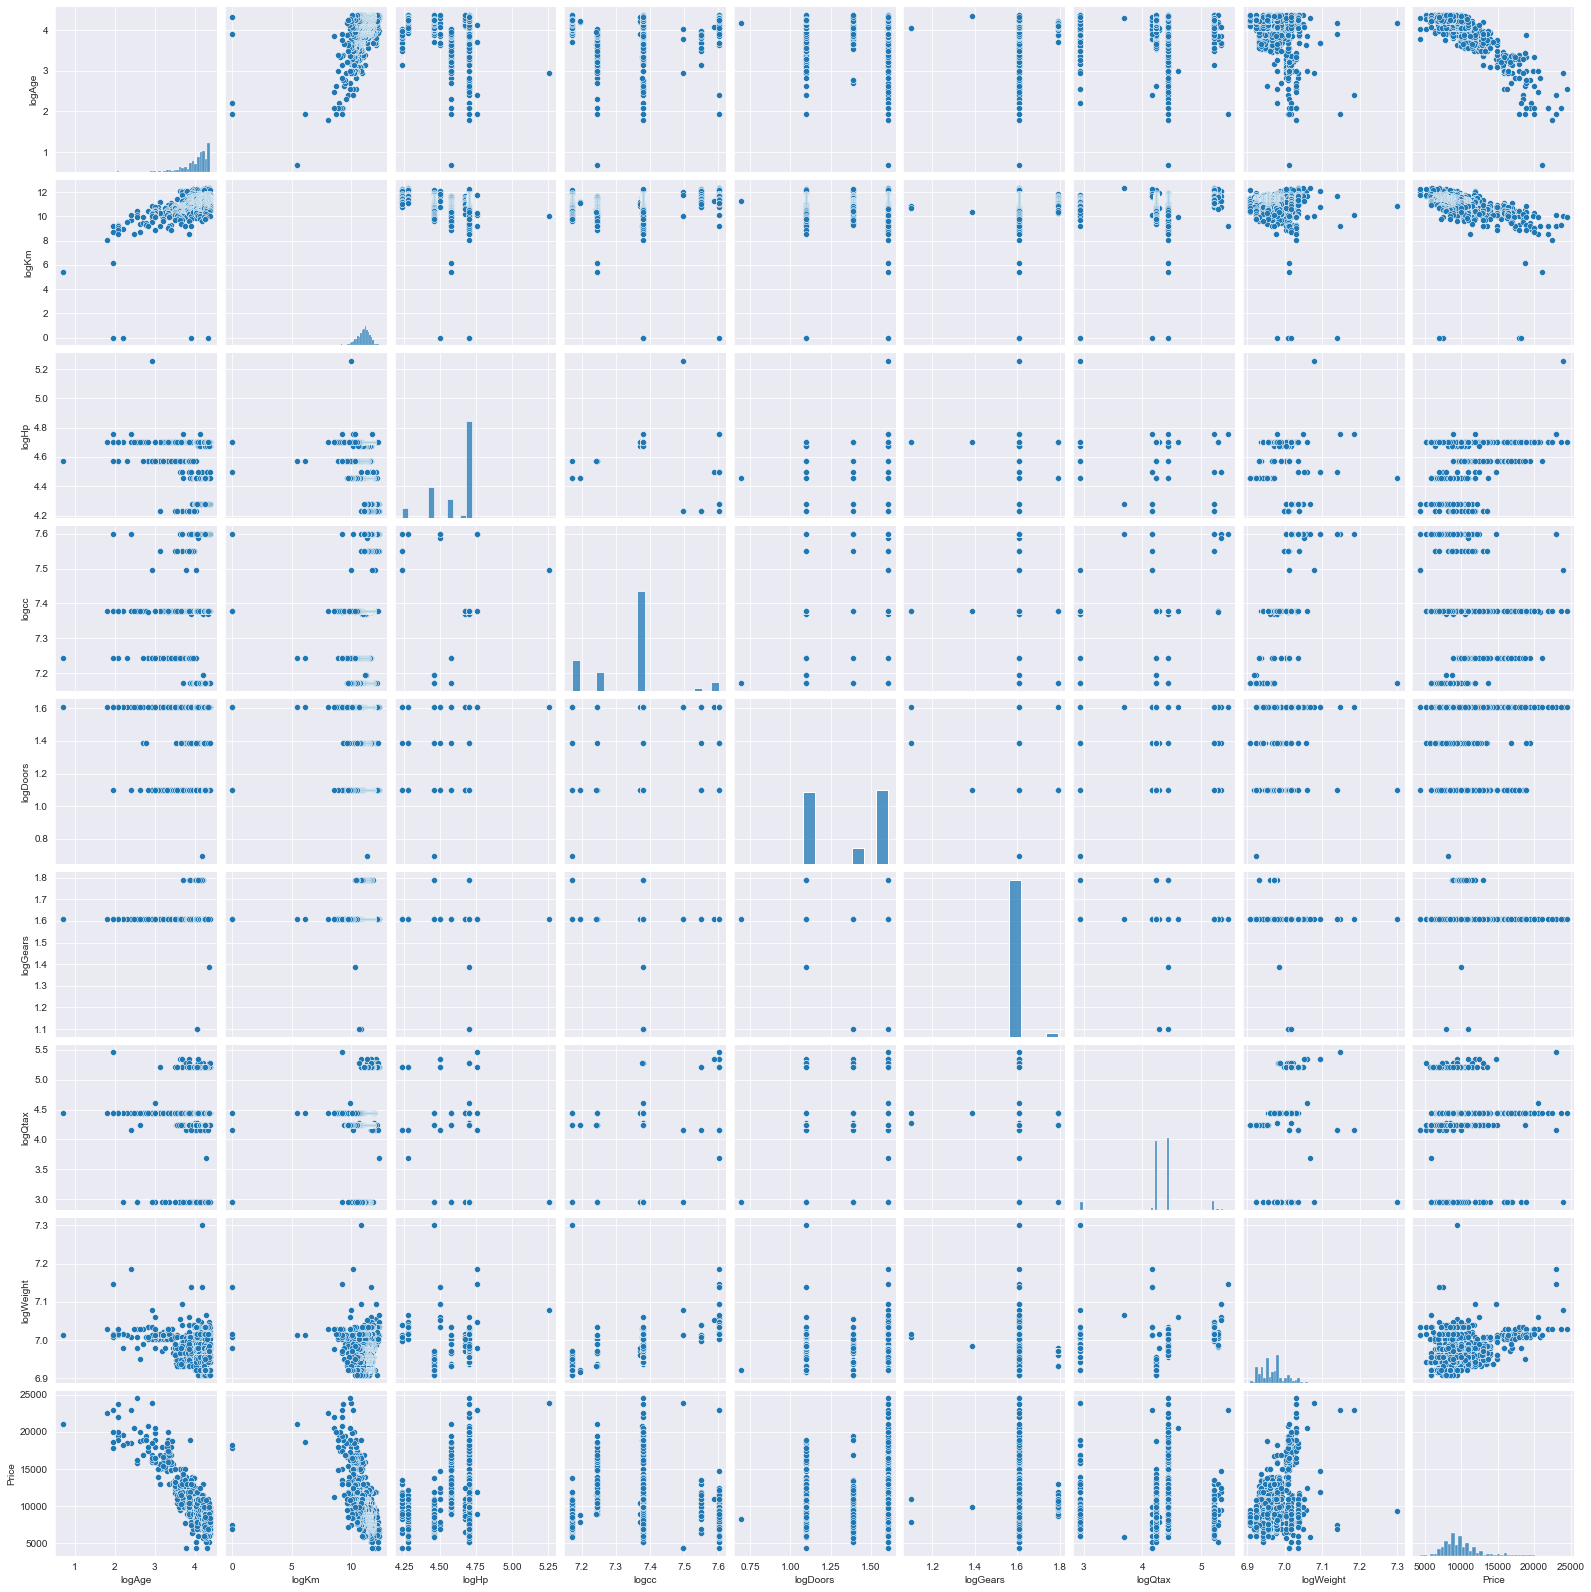

In [284]:
sns.set_style(style='darkgrid')
sns.pairplot(corolla_2)

In [285]:
corolla_2.corr()

,logAge,logKm,logHp,logcc,logDoors,logGears,logQtax,logWeight,Price
logAge,1.000000,0.555553,-0.103073,-0.027634,-0.129087,0.027057,-0.048841,-0.386480,-0.879650
logKm,0.555553,1.000000,-0.157824,0.111741,-0.042103,0.034829,0.155511,-0.135044,-0.504013
logHp,-0.103073,-0.157824,1.000000,0.168753,0.126768,0.058400,-0.252039,0.040107,0.239783
logcc,-0.027634,0.111741,0.168753,1.000000,0.155275,0.025388,0.408030,0.650080,0.046310
logDoors,-0.129087,-0.042103,0.126768,0.155275,1.000000,-0.143941,0.112900,0.389037,0.182334
logGears,0.027057,0.034829,0.058400,0.025388,-0.143941,1.000000,0.016428,-0.031363,0.013299
logQtax,-0.048841,0.155511,-0.252039,0.408030,0.112900,0.016428,1.000000,0.314352,0.040557
logWeight,-0.386480,-0.135044,0.040107,0.650080,0.389037,-0.031363,0.314352,1.000000,0.412976
Price,-0.879650,-0.504013,0.239783,0.046310,0.182334,0.013299,0.040557,0.412976,1.000000


<AxesSubplot:>

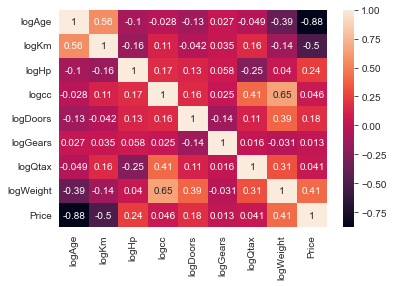

In [286]:
sns.heatmap(corolla_2.corr(),annot=True)

##  Model building using Statsmodel:

In [287]:
import statsmodels.formula.api as smf

In [288]:
corolla_2.corr()

,logAge,logKm,logHp,logcc,logDoors,logGears,logQtax,logWeight,Price
logAge,1.000000,0.555553,-0.103073,-0.027634,-0.129087,0.027057,-0.048841,-0.386480,-0.879650
logKm,0.555553,1.000000,-0.157824,0.111741,-0.042103,0.034829,0.155511,-0.135044,-0.504013
logHp,-0.103073,-0.157824,1.000000,0.168753,0.126768,0.058400,-0.252039,0.040107,0.239783
logcc,-0.027634,0.111741,0.168753,1.000000,0.155275,0.025388,0.408030,0.650080,0.046310
logDoors,-0.129087,-0.042103,0.126768,0.155275,1.000000,-0.143941,0.112900,0.389037,0.182334
logGears,0.027057,0.034829,0.058400,0.025388,-0.143941,1.000000,0.016428,-0.031363,0.013299
logQtax,-0.048841,0.155511,-0.252039,0.408030,0.112900,0.016428,1.000000,0.314352,0.040557
logWeight,-0.386480,-0.135044,0.040107,0.650080,0.389037,-0.031363,0.314352,1.000000,0.412976
Price,-0.879650,-0.504013,0.239783,0.046310,0.182334,0.013299,0.040557,0.412976,1.000000


In [289]:
corolla_2.head(1)

,logAge,logKm,logHp,logcc,logDoors,logGears,logQtax,logWeight,Price
0,3.135494,11.172377,4.234107,7.549609,1.098612,1.609438,5.220356,7.007601,12950


####  Models: 

In [290]:
model1=smf.ols(formula='Price~logAge+logKm+logHp+logcc+logDoors+logGears+logQtax+logWeight', data=corolla_2).fit()

In [291]:
model2=smf.ols(formula='Price~logAge+logKm+logHp+logcc+logDoors+logGears+logQtax', data=corolla_2).fit()

In [292]:
model3=smf.ols(formula='Price~logAge+logHp+logcc+logDoors+logGears+logQtax+logWeight', data=corolla_2).fit()

In [293]:
model4=smf.ols(formula='Price~logAge+logHp+logcc+logDoors+logGears+logQtax', data=corolla_2).fit()

In [294]:
model5=smf.ols(formula='Price~logAge+logHp+logcc+logGears+logQtax+logWeight', data=corolla_2).fit()

In [295]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     673.6
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:18:55   Log-Likelihood:                -10717.
No. Observations:                1253   AIC:                         2.145e+04
Df Residuals:                    1244   BIC:                         2.150e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -6.47e+04   1.04e+04     -6.239      0.000    -8.5e+04   -4.44e+04
logAge     -5647.3268    117.835    -47.926      0.000   -5878.504   -5416.149
logKm        -13.8316     50.979     -0.271      0.786    -113.845      86.182
logHp       4006.2950    305.148     13.129      0.000    3407.633    4604.956
logcc      -3723.6292    513.297     -7.254      0.000   -4730.652   -2716.607
logDoors     132.9125    165.801      0.802      0.423    -192.368     458.193
logGears    2676.3318    985.837      2.715      0.007     742.245    4610.418
logQtax      360.5889    104.658      3.445      0.001     155.264     565.914
logWeight   1.442e+04   1728.894      8.341      0.000     1.1e+04    1.78e+04
==============================================================================
Omnibus:                      125.009   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              893.970
Skew:                          -0.044   Prob(JB):                    7.53e-195
Kurtosis:                       7.137   Cond. No.                     4.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [296]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     840.7
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:18:55   Log-Likelihood:                -10751.
No. Observations:                1253   AIC:                         2.152e+04
Df Residuals:                    1246   BIC:                         2.155e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.808e+04   3072.191      5.884      0.000    1.21e+04    2.41e+04
logAge     -6088.7973     91.095    -66.840      0.000   -6267.514   -5910.081
logHp       3475.4499    304.507     11.413      0.000    2878.046    4072.854
logcc       -859.0864    387.589     -2.216      0.027   -1619.485     -98.687
logDoors     675.7552    156.470      4.319      0.000     368.781     982.730
logGears    2797.3610   1011.806      2.765      0.006     812.330    4782.392
logQtax      322.0435    106.537      3.023      0.003     113.032     531.055
==============================================================================
Omnibus:                      140.484   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1185.492
Skew:                           0.059   Prob(JB):                    3.75e-258
Kurtosis:                       7.764   Cond. No.                         920.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     899.0
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:18:55   Log-Likelihood:                -10717.
No. Observations:                1253   AIC:                         2.145e+04
Df Residuals:                    1246   BIC:                         2.148e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.788e+04   9613.933     -7.060      0.000   -8.67e+04    -4.9e+04
logAge     -5654.1637    101.598    -55.653      0.000   -5853.485   -5454.842
logHp       4063.0981    297.187     13.672      0.000    3480.056    4646.140
logcc      -3822.3411    499.203     -7.657      0.000   -4801.713   -2842.969
logGears    2550.8619    973.668      2.620      0.009     640.652    4461.072
logQtax      365.5906    103.214      3.542      0.000     163.097     568.084
logWeight   1.498e+04   1587.768      9.433      0.000    1.19e+04    1.81e+04
==============================================================================
Omnibus:                      122.888   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              858.212
Skew:                          -0.044   Prob(JB):                    4.38e-187
Kurtosis:                       7.053   Cond. No.                     3.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model performance: 

####  Model5:performance

In [298]:
print('R2 Score    : ',round(model5.rsquared,4))
print('Adj.R2 Score: ',round(model5.rsquared_adj,4))
print('AIC Value   : ',round(model5.aic,4))
print('BIC Value   : ',round(model5.bic,4))

R2 Score    :  0.8123
Adj.R2 Score:  0.8114
AIC Value   :  21448.4691
BIC Value   :  21484.4022


#### Model4 performance: 

In [299]:
print('R2 Score    : ',round(model4.rsquared,4))
print('Adj.R2 Score: ',round(model4.rsquared_adj,4))
print('AIC Value   : ',round(model4.aic,4))
print('BIC Value   : ',round(model4.bic,4))

R2 Score    :  0.8019
Adj.R2 Score:  0.801
AIC Value   :  21516.28
BIC Value   :  21552.2131


###  Conclusion :
####    From LOG Transformation:
####   Model 5   has good performance

##  3. Squareroot Transformation:

In [300]:
corolla_3=corolla.copy()

In [301]:
corolla_3.head(1)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12950,23,71138,69,1900,3,5,185,1105


In [302]:
corolla_3["SqrtAge"]=np.sqrt(corolla_3["Age_08_04"])
corolla_3["SqrtKM"]=np.sqrt(corolla_3["KM"])
corolla_3["SqrtHP"]=np.sqrt(corolla_3["HP"])
corolla_3["Sqrtcc"]=np.sqrt(corolla_3["cc"])
corolla_3["SqrtDoors"]=np.sqrt(corolla_3["Doors"])
corolla_3["SqrtGears"]=np.sqrt(corolla_3["Gears"])
corolla_3["SqrtQTax"]=np.sqrt(corolla_3["Quarterly_Tax"])
corolla_3["SqrtWeight"]=np.sqrt(corolla_3["Weight"])


In [303]:
corolla_3.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,SqrtAge,SqrtKM,SqrtHP,Sqrtcc,SqrtDoors,SqrtGears,SqrtQTax,SqrtWeight
0,12950,23,71138,69,1900,3,5,185,1105,4.795832,266.717079,8.306624,43.588989,1.732051,2.236068,13.601471,33.241540
1,17950,24,21716,110,1600,3,5,85,1105,4.898979,147.363496,10.488088,40.000000,1.732051,2.236068,9.219544,33.241540
2,16750,24,25563,110,1600,3,5,19,1065,4.898979,159.884333,10.488088,40.000000,1.732051,2.236068,4.358899,32.634338
3,16950,30,64359,110,1600,3,5,85,1105,5.477226,253.690757,10.488088,40.000000,1.732051,2.236068,9.219544,33.241540
4,15950,30,67660,110,1600,3,5,85,1105,5.477226,260.115359,10.488088,40.000000,1.732051,2.236068,9.219544,33.241540


In [304]:
corolla_4=corolla_3.iloc[:,9:]
corolla_4["Price"]=corolla_3["Price"]
corolla_4.head()

,SqrtAge,SqrtKM,SqrtHP,Sqrtcc,SqrtDoors,SqrtGears,SqrtQTax,SqrtWeight,Price
0,4.795832,266.717079,8.306624,43.588989,1.732051,2.236068,13.601471,33.241540,12950
1,4.898979,147.363496,10.488088,40.000000,1.732051,2.236068,9.219544,33.241540,17950
2,4.898979,159.884333,10.488088,40.000000,1.732051,2.236068,4.358899,32.634338,16750
3,5.477226,253.690757,10.488088,40.000000,1.732051,2.236068,9.219544,33.241540,16950
4,5.477226,260.115359,10.488088,40.000000,1.732051,2.236068,9.219544,33.241540,15950


###  Scatter plot and pair plot:

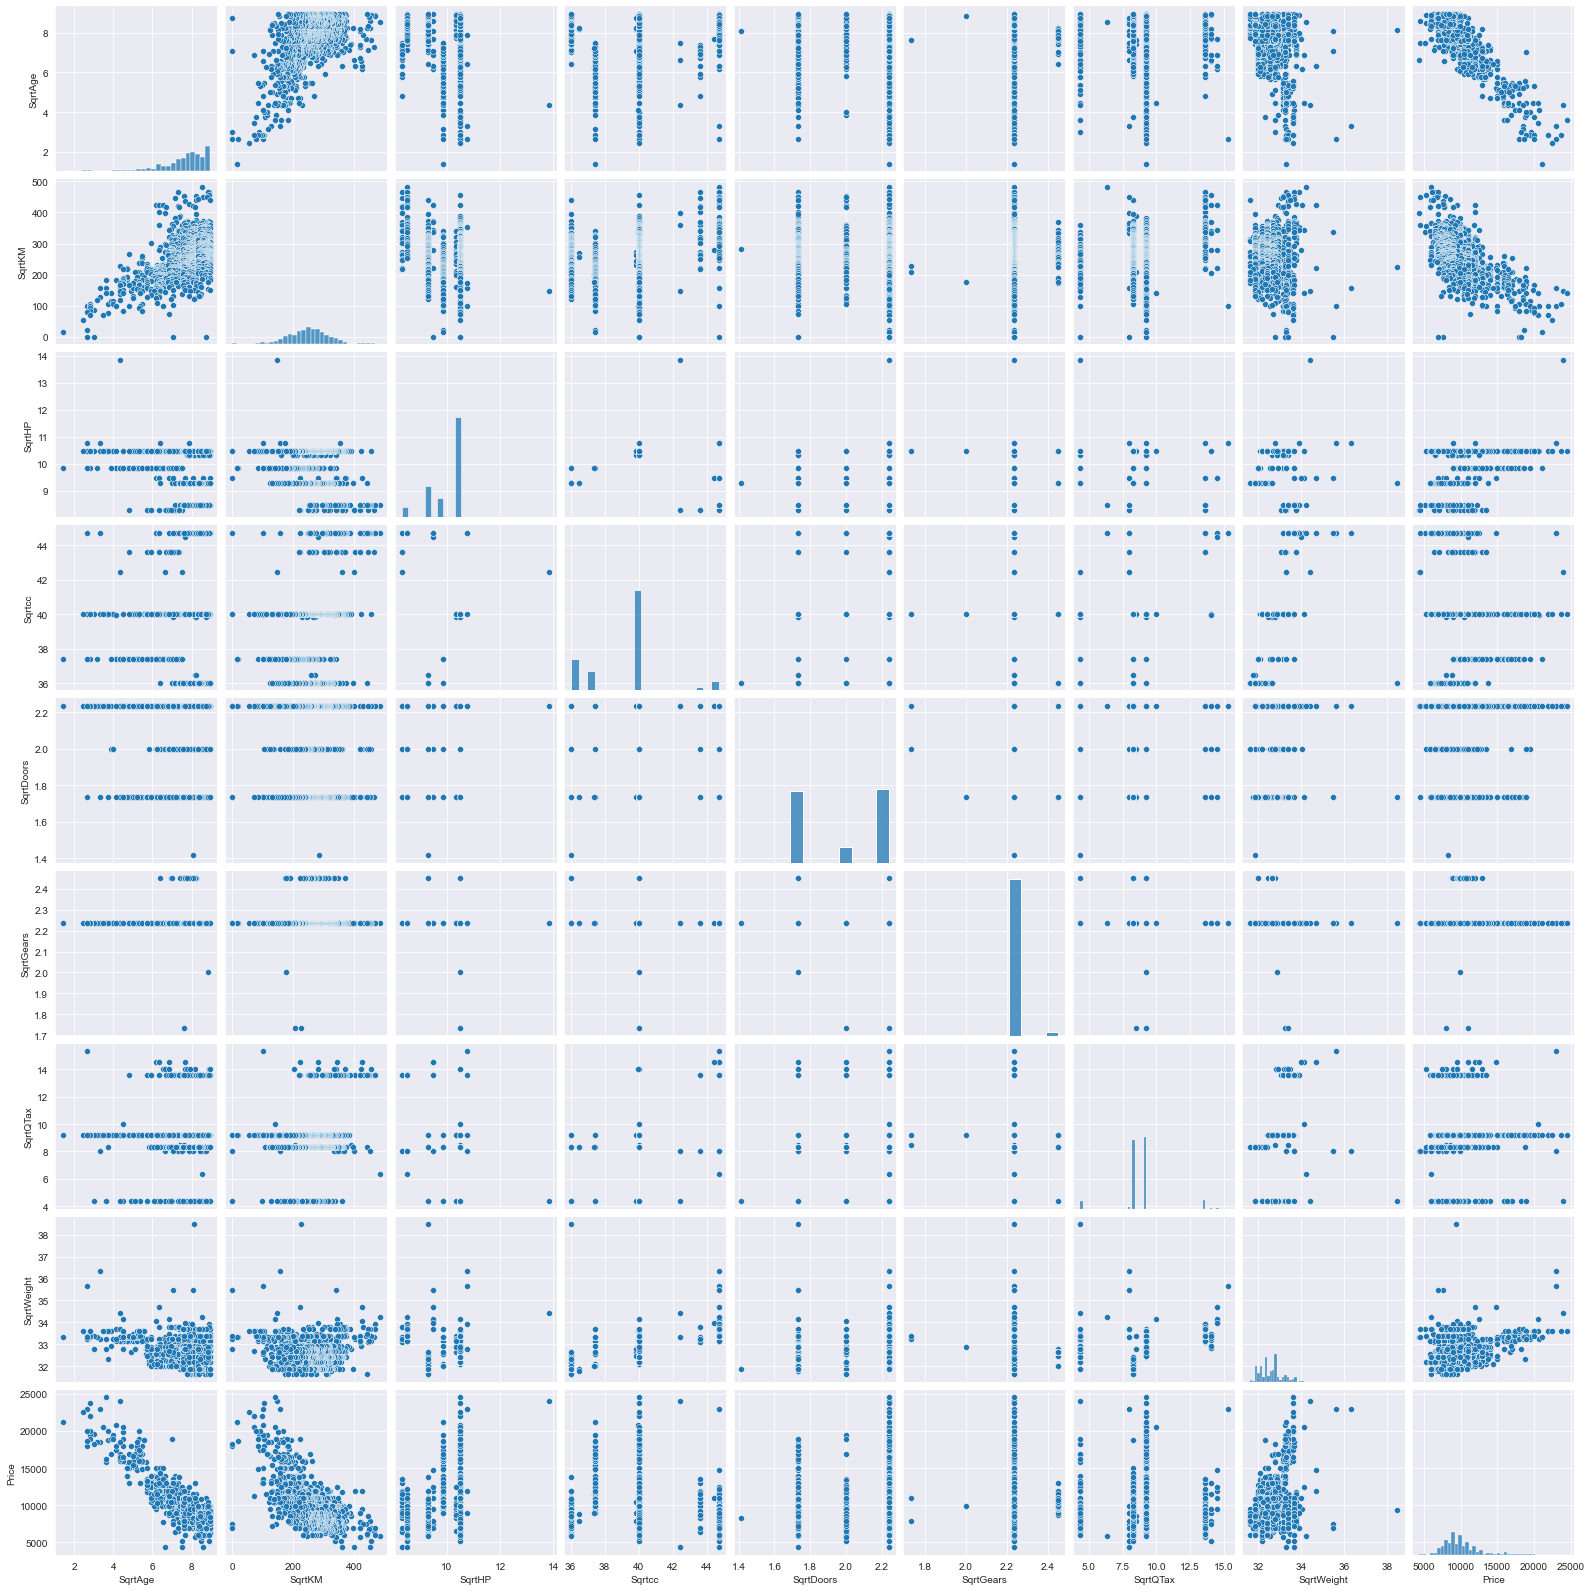

In [305]:
sns.set_style(style='darkgrid')
sns.pairplot(corolla_4)

### Correlation Matrix and Heatmap:

In [306]:
corolla_4.corr()

,SqrtAge,SqrtKM,SqrtHP,Sqrtcc,SqrtDoors,SqrtGears,SqrtQTax,SqrtWeight,Price
SqrtAge,1.000000,0.579472,-0.101973,-0.028538,-0.125990,0.025106,-0.064947,-0.372716,-0.886638
SqrtKM,0.579472,1.000000,-0.253127,0.262448,-0.038654,0.041344,0.254088,-0.022723,-0.631229
SqrtHP,-0.101973,-0.253127,1.000000,0.159147,0.130376,0.064699,-0.319626,0.051683,0.240669
Sqrtcc,-0.028538,0.262448,0.159147,1.000000,0.149776,0.025834,0.523719,0.647117,0.037496
SqrtDoors,-0.125990,-0.038654,0.130376,0.149776,1.000000,-0.148617,0.126608,0.386663,0.184477
SqrtGears,0.025106,0.041344,0.064699,0.025834,-0.148617,1.000000,0.011951,-0.028937,0.012977
SqrtQTax,-0.064947,0.254088,-0.319626,0.523719,0.126608,0.011951,1.000000,0.415168,0.034731
SqrtWeight,-0.372716,-0.022723,0.051683,0.647117,0.386663,-0.028937,0.415168,1.000000,0.410217
Price,-0.886638,-0.631229,0.240669,0.037496,0.184477,0.012977,0.034731,0.410217,1.000000


<AxesSubplot:>

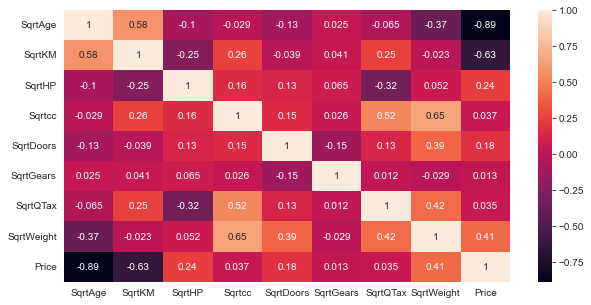

In [307]:
plt.figure(figsize=(10,5))
sns.heatmap(corolla_4.corr(),annot=True)

###  Model Building using statsmodel:

In [308]:
corolla_4.head(2)

,SqrtAge,SqrtKM,SqrtHP,Sqrtcc,SqrtDoors,SqrtGears,SqrtQTax,SqrtWeight,Price
0,4.795832,266.717079,8.306624,43.588989,1.732051,2.236068,13.601471,33.24154,12950
1,4.898979,147.363496,10.488088,40.000000,1.732051,2.236068,9.219544,33.24154,17950


###  Models:

In [309]:
model6=smf.ols(formula='Price~SqrtAge+SqrtKM+SqrtHP+Sqrtcc+SqrtDoors+SqrtGears+SqrtQTax+SqrtWeight', data=corolla_4).fit()

In [310]:
model7=smf.ols(formula='Price~SqrtAge+SqrtKM+SqrtHP+Sqrtcc+SqrtDoors+SqrtGears+SqrtQTax', data=corolla_4).fit()

In [311]:
model8=smf.ols(formula='Price~SqrtAge+SqrtHP+Sqrtcc+SqrtDoors+SqrtGears+SqrtQTax+SqrtWeight', data=corolla_4).fit()

In [312]:
model9=smf.ols(formula='Price~SqrtAge+SqrtHP+Sqrtcc+SqrtDoors+SqrtGears+SqrtQTax', data=corolla_4).fit()

In [313]:
model10=smf.ols(formula='Price~SqrtAge+SqrtKM+SqrtHP+Sqrtcc+SqrtGears+SqrtQTax+SqrtWeight', data=corolla_4).fit()

In [314]:
model11=smf.ols(formula='Price~SqrtAge+SqrtKM+SqrtHP+Sqrtcc+SqrtWeight+SqrtQTax', data=corolla_4).fit()

In [315]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     830.2
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:19:29   Log-Likelihood:                -10608.
No. Observations:                1253   AIC:                         2.123e+04
Df Residuals:                    1244   BIC:                         2.128e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.345e+04   3190.919     -4.214      0.000   -1.97e+04   -7185.801
SqrtAge    -1653.1379     36.652    -45.104      0.000   -1725.044   -1581.232
SqrtKM        -7.1550      0.670    -10.672      0.000      -8.470      -5.840
SqrtHP       683.0456     62.785     10.879      0.000     559.869     806.223
Sqrtcc      -155.5703     25.474     -6.107      0.000    -205.548    -105.593
SqrtDoors    180.1764    154.239      1.168      0.243    -122.421     482.774
SqrtGears   2655.6856    814.523      3.260      0.001    1057.695    4253.676
SqrtQTax     108.6278     26.344      4.123      0.000      56.944     160.311
SqrtWeight   917.3774     93.686      9.792      0.000     733.578    1101.176
==============================================================================
Omnibus:                      107.701   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.229
Skew:                           0.151   Prob(JB):                    2.26e-127
Kurtosis:                       6.329   Cond. No.                     2.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [316]:
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     948.4
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:19:29   Log-Likelihood:                -10609.
No. Observations:                1253   AIC:                         2.123e+04
Df Residuals:                    1245   BIC:                         2.128e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.408e+04   3144.458     -4.479      0.000   -2.03e+04   -7913.842
SqrtAge    -1650.1743     36.569    -45.125      0.000   -1721.918   -1578.431
SqrtKM        -7.1319      0.670    -10.641      0.000      -8.447      -5.817
SqrtHP       697.8822     61.496     11.348      0.000     577.234     818.530
Sqrtcc      -161.9075     24.894     -6.504      0.000    -210.745    -113.070
SqrtGears   2503.3311    804.131      3.113      0.002     925.729    4080.933
SqrtQTax     111.9699     26.192      4.275      0.000      60.585     163.355
SqrtWeight   959.6454     86.429     11.103      0.000     790.083    1129.207
==============================================================================
Omnibus:                      108.328   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              604.025
Skew:                           0.131   Prob(JB):                    6.88e-132
Kurtosis:                       6.391   Cond. No.                     2.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [317]:
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1097.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:19:29   Log-Likelihood:                -10614.
No. Observations:                1253   AIC:                         2.124e+04
Df Residuals:                    1246   BIC:                         2.128e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8270.2945   2538.909     -3.257      0.001   -1.33e+04   -3289.285
SqrtAge    -1652.1391     36.691    -45.029      0.000   -1724.122   -1580.156
SqrtKM        -7.0386      0.672    -10.476      0.000      -8.357      -5.720
SqrtHP       712.7516     61.524     11.585      0.000     592.049     833.454
Sqrtcc      -161.1560     24.979     -6.452      0.000    -210.162    -112.150
SqrtWeight   946.9205     86.633     10.930      0.000     776.959    1116.882
SqrtQTax     114.7333     26.268      4.368      0.000      63.199     166.268
==============================================================================
Omnibus:                      105.877   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              579.581
Skew:                           0.121   Prob(JB):                    1.40e-126
Kurtosis:                       6.323   Cond. No.                     2.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Model performance:

In [318]:
print('R2 Score    : ',round(model6.rsquared,4))
print('Adj.R2 Score: ',round(model6.rsquared_adj,4))
print('AIC Value   : ',round(model6.aic,4))
print('BIC Value   : ',round(model6.bic,4))

R2 Score    :  0.8422
Adj.R2 Score:  0.8412
AIC Value   :  21234.9888
BIC Value   :  21281.1885


In [319]:
print('R2 Score    : ',round(model7.rsquared,4))
print('Adj.R2 Score: ',round(model7.rsquared_adj,4))
print('AIC Value   : ',round(model7.aic,4))
print('BIC Value   : ',round(model7.bic,4))

R2 Score    :  0.8301
Adj.R2 Score:  0.8291
AIC Value   :  21326.0264
BIC Value   :  21367.0928


In [320]:
print('R2 Score    : ',round(model8.rsquared,4))
print('Adj.R2 Score: ',round(model8.rsquared_adj,4))
print('AIC Value   : ',round(model8.aic,4))
print('BIC Value   : ',round(model8.bic,4))

R2 Score    :  0.8278
Adj.R2 Score:  0.8268
AIC Value   :  21342.7613
BIC Value   :  21383.8277


In [321]:
print('R2 Score    : ',round(model9.rsquared,4))
print('Adj.R2 Score: ',round(model9.rsquared_adj,4))
print('AIC Value   : ',round(model9.aic,4))
print('BIC Value   : ',round(model9.bic,4))

R2 Score    :  0.815
Adj.R2 Score:  0.8141
AIC Value   :  21430.6003
BIC Value   :  21466.5333


In [322]:
print('R2 Score    : ',round(model10.rsquared,4))
print('Adj.R2 Score: ',round(model10.rsquared_adj,4))
print('AIC Value   : ',round(model10.aic,4))
print('BIC Value   : ',round(model10.bic,4))

R2 Score    :  0.8421
Adj.R2 Score:  0.8412
AIC Value   :  21234.3626
BIC Value   :  21275.4289


In [323]:
print('R2 Score    : ',round(model11.rsquared,4))
print('Adj.R2 Score: ',round(model11.rsquared_adj,4))
print('AIC Value   : ',round(model11.aic,4))
print('BIC Value   : ',round(model11.bic,4))

R2 Score    :  0.8408
Adj.R2 Score:  0.8401
AIC Value   :  21242.0784
BIC Value   :  21278.0114


###  we have to find which model is best:

###  we have understand the  influences of the various variables in the models: 

### Residual Vs Regressors:plot

In [324]:
import statsmodels.api as sm

In [325]:
corolla_4.head(1)

,SqrtAge,SqrtKM,SqrtHP,Sqrtcc,SqrtDoors,SqrtGears,SqrtQTax,SqrtWeight,Price
0,4.795832,266.717079,8.306624,43.588989,1.732051,2.236068,13.601471,33.24154,12950


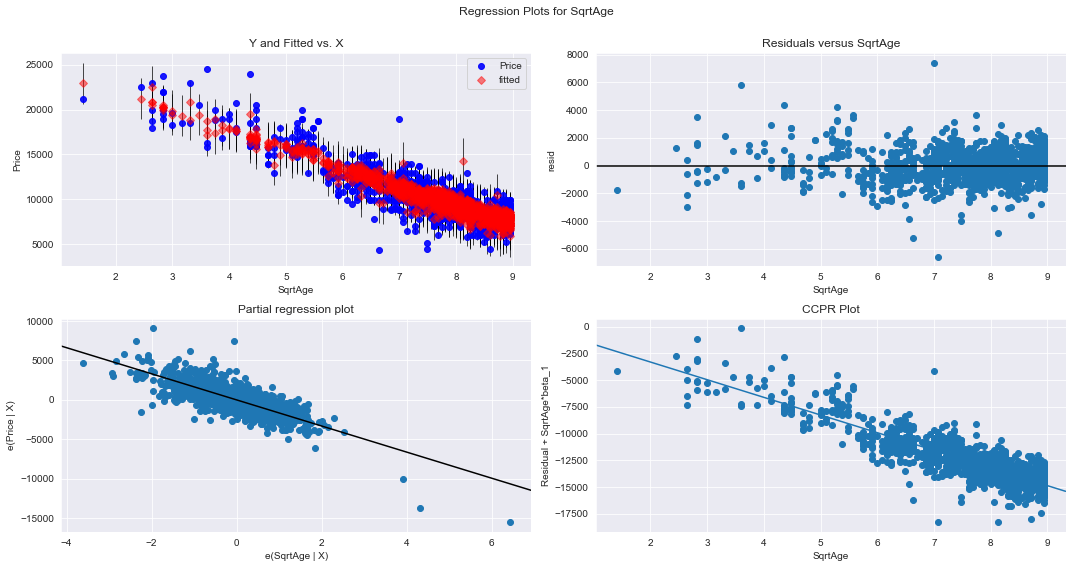

In [326]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model6, "SqrtAge", fig=fig)
plt.show()

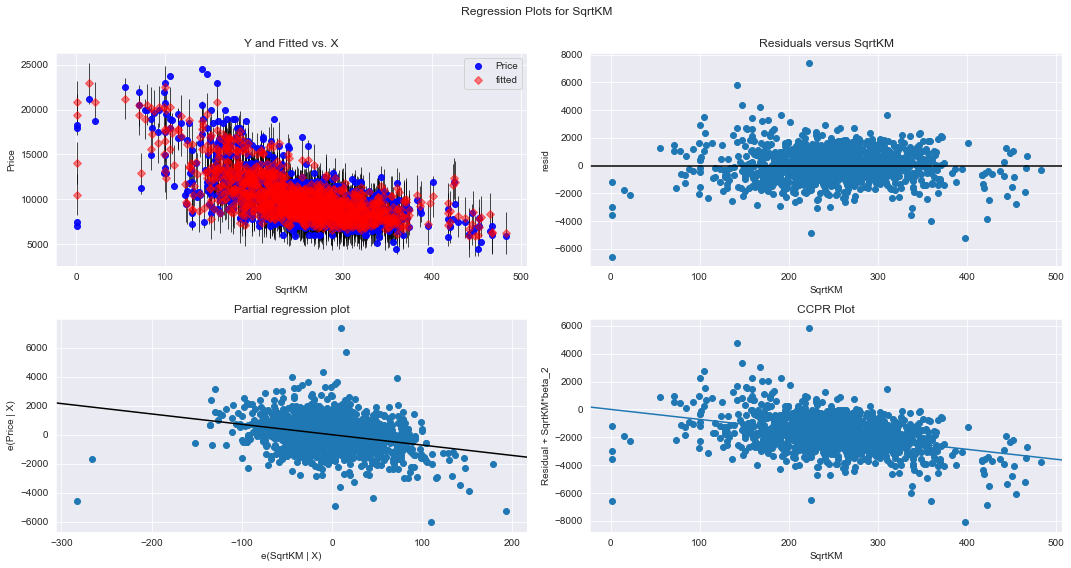

In [327]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model6, "SqrtKM", fig=fig)
plt.show()

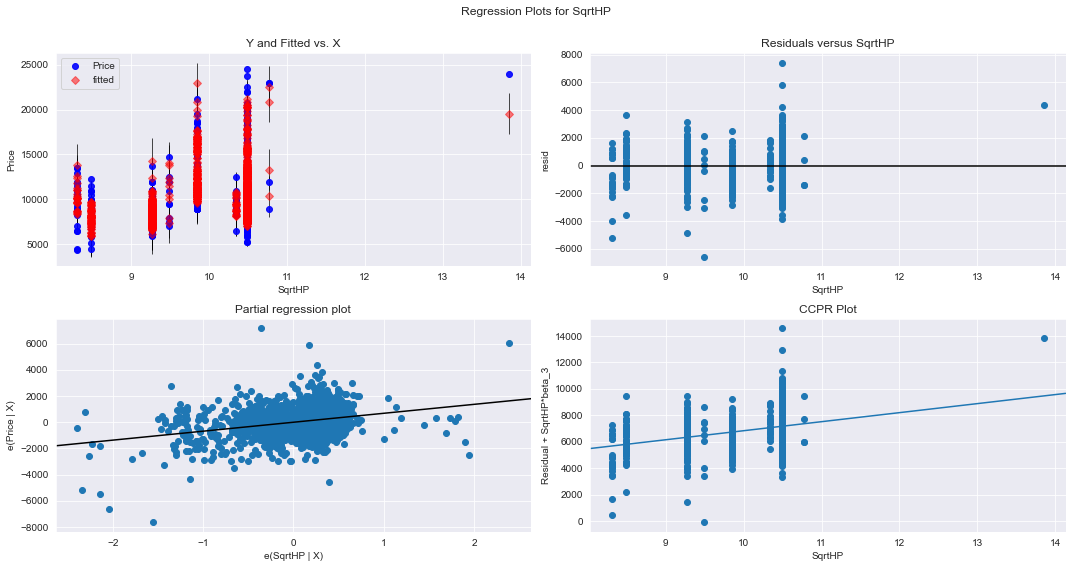

In [328]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model6, "SqrtHP", fig=fig)
plt.show()

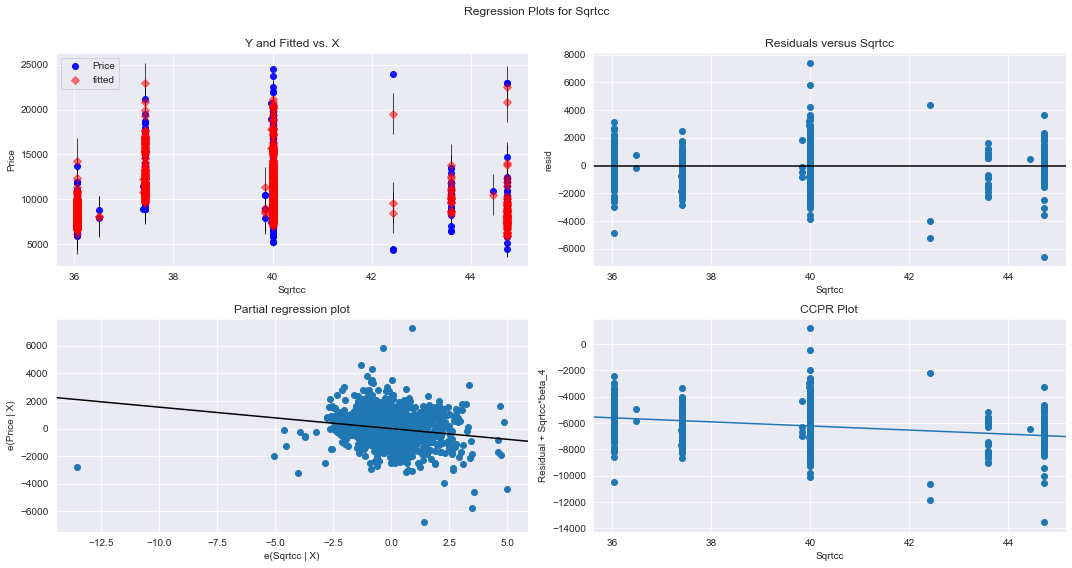

In [329]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model6, "Sqrtcc", fig=fig)
plt.show()

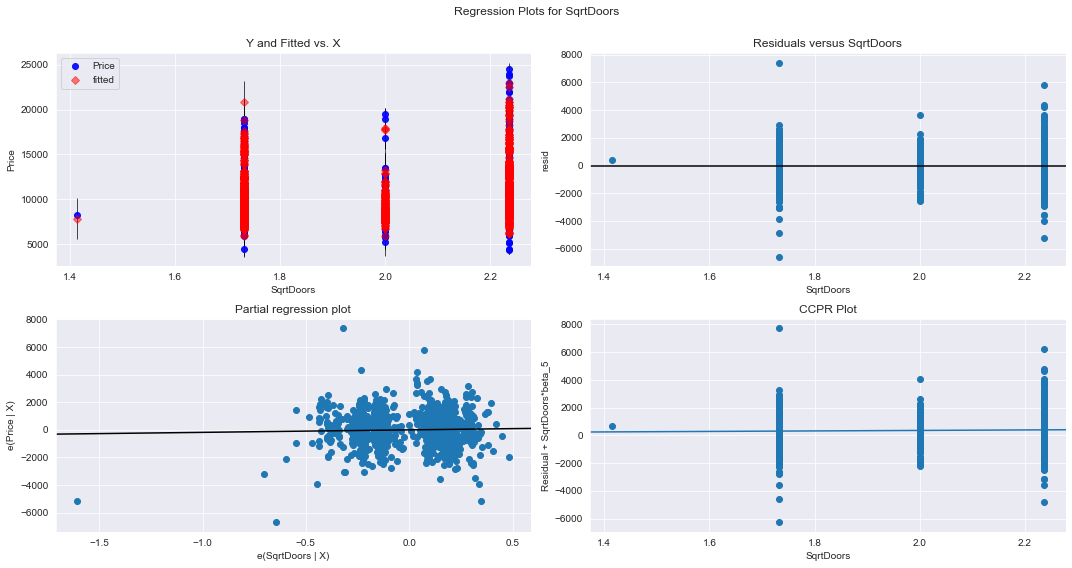

In [330]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model6, "SqrtDoors", fig=fig)
plt.show()

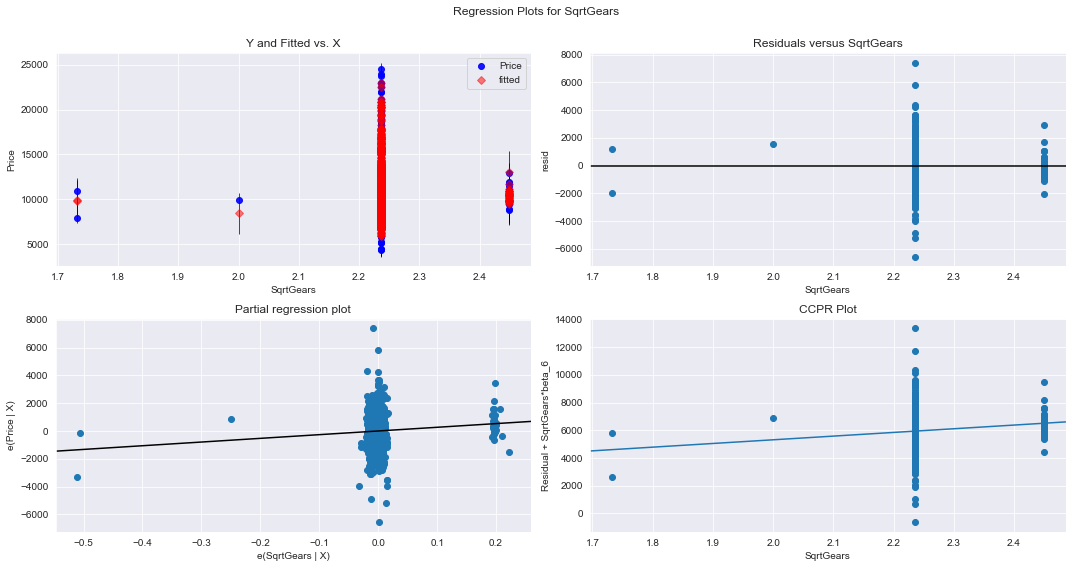

In [331]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model6, "SqrtGears", fig=fig)
plt.show()

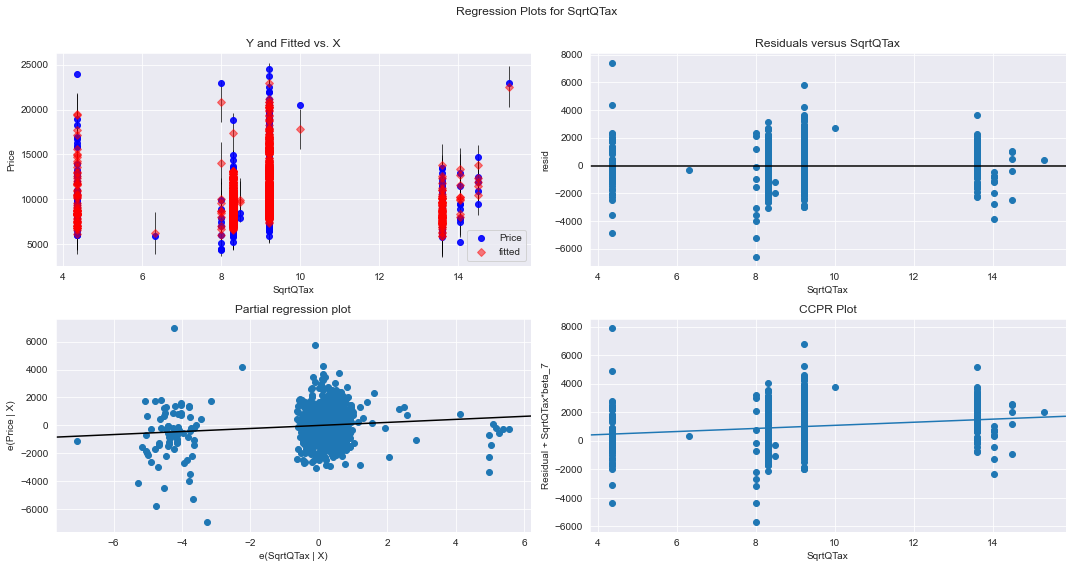

In [332]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model6, "SqrtQTax", fig=fig)
plt.show()

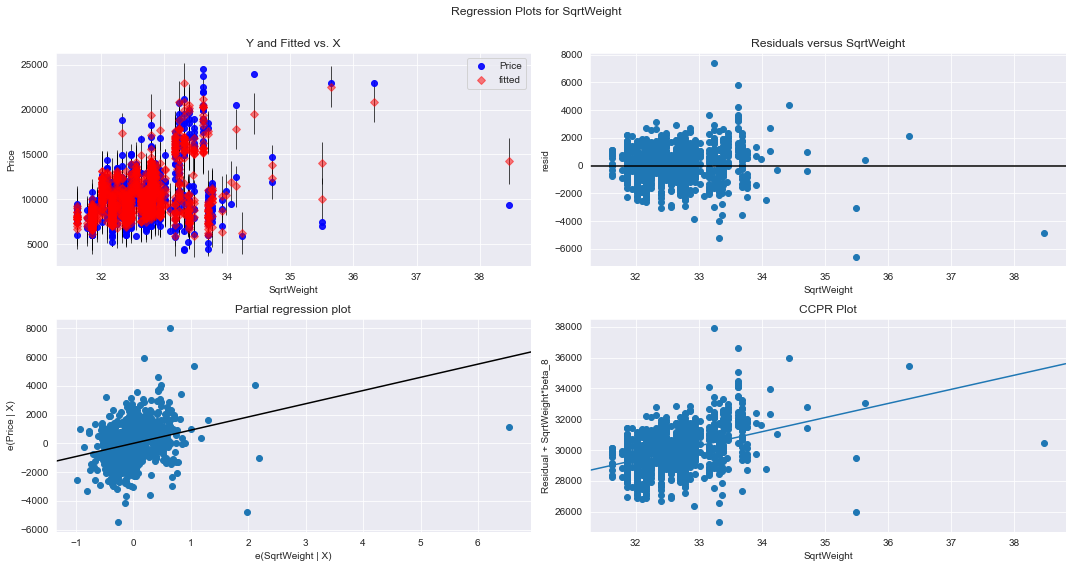

In [333]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model6, "SqrtWeight", fig=fig)
plt.show()

###  observation from the plot :
#### some features have less contribution 
#### we drop  ** "SqrtDoors" ** features from the model

###  Conclusion:

###   From Squareroot transform :

###   ->                                                  model 10 is best

##  4. Cuberoot Transformation:

In [334]:
corolla.head(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12950,23,71138,69,1900,3,5,185,1105
1,17950,24,21716,110,1600,3,5,85,1105


In [335]:
corolla_5=corolla.copy()

In [336]:
corolla_5.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12950,23,71138,69,1900,3,5,185,1105
1,17950,24,21716,110,1600,3,5,85,1105
2,16750,24,25563,110,1600,3,5,19,1065
3,16950,30,64359,110,1600,3,5,85,1105
4,15950,30,67660,110,1600,3,5,85,1105


In [337]:
corolla_5["CUBAge"]=np.cbrt(corolla_5["Age_08_04"])
corolla_5["CUBKM"]=np.cbrt(corolla_5["KM"])
corolla_5["CUBHP"]=np.cbrt(corolla_5["HP"])
corolla_5["CUBcc"]=np.cbrt(corolla_5["cc"])
corolla_5["CUBDoors"]=np.cbrt(corolla_5["Doors"])
corolla_5["CUBGears"]=np.cbrt(corolla_5["Gears"])
corolla_5["CUBQTax"]=np.cbrt(corolla_5["Quarterly_Tax"])
corolla_5["CUBWeight"]=np.cbrt(corolla_5["Weight"])


In [338]:
corolla_6=corolla_5.iloc[:,9:]
corolla_6["Price"]=corolla_5["Price"]

In [339]:
corolla_6.head(2)

,CUBAge,CUBKM,CUBHP,CUBcc,CUBDoors,CUBGears,CUBQTax,CUBWeight,Price
0,2.843867,41.434988,4.101566,12.385623,1.44225,1.709976,5.698019,10.338418,12950
1,2.884499,27.899298,4.791420,11.696071,1.44225,1.709976,4.396830,10.338418,17950


### Pairplot:

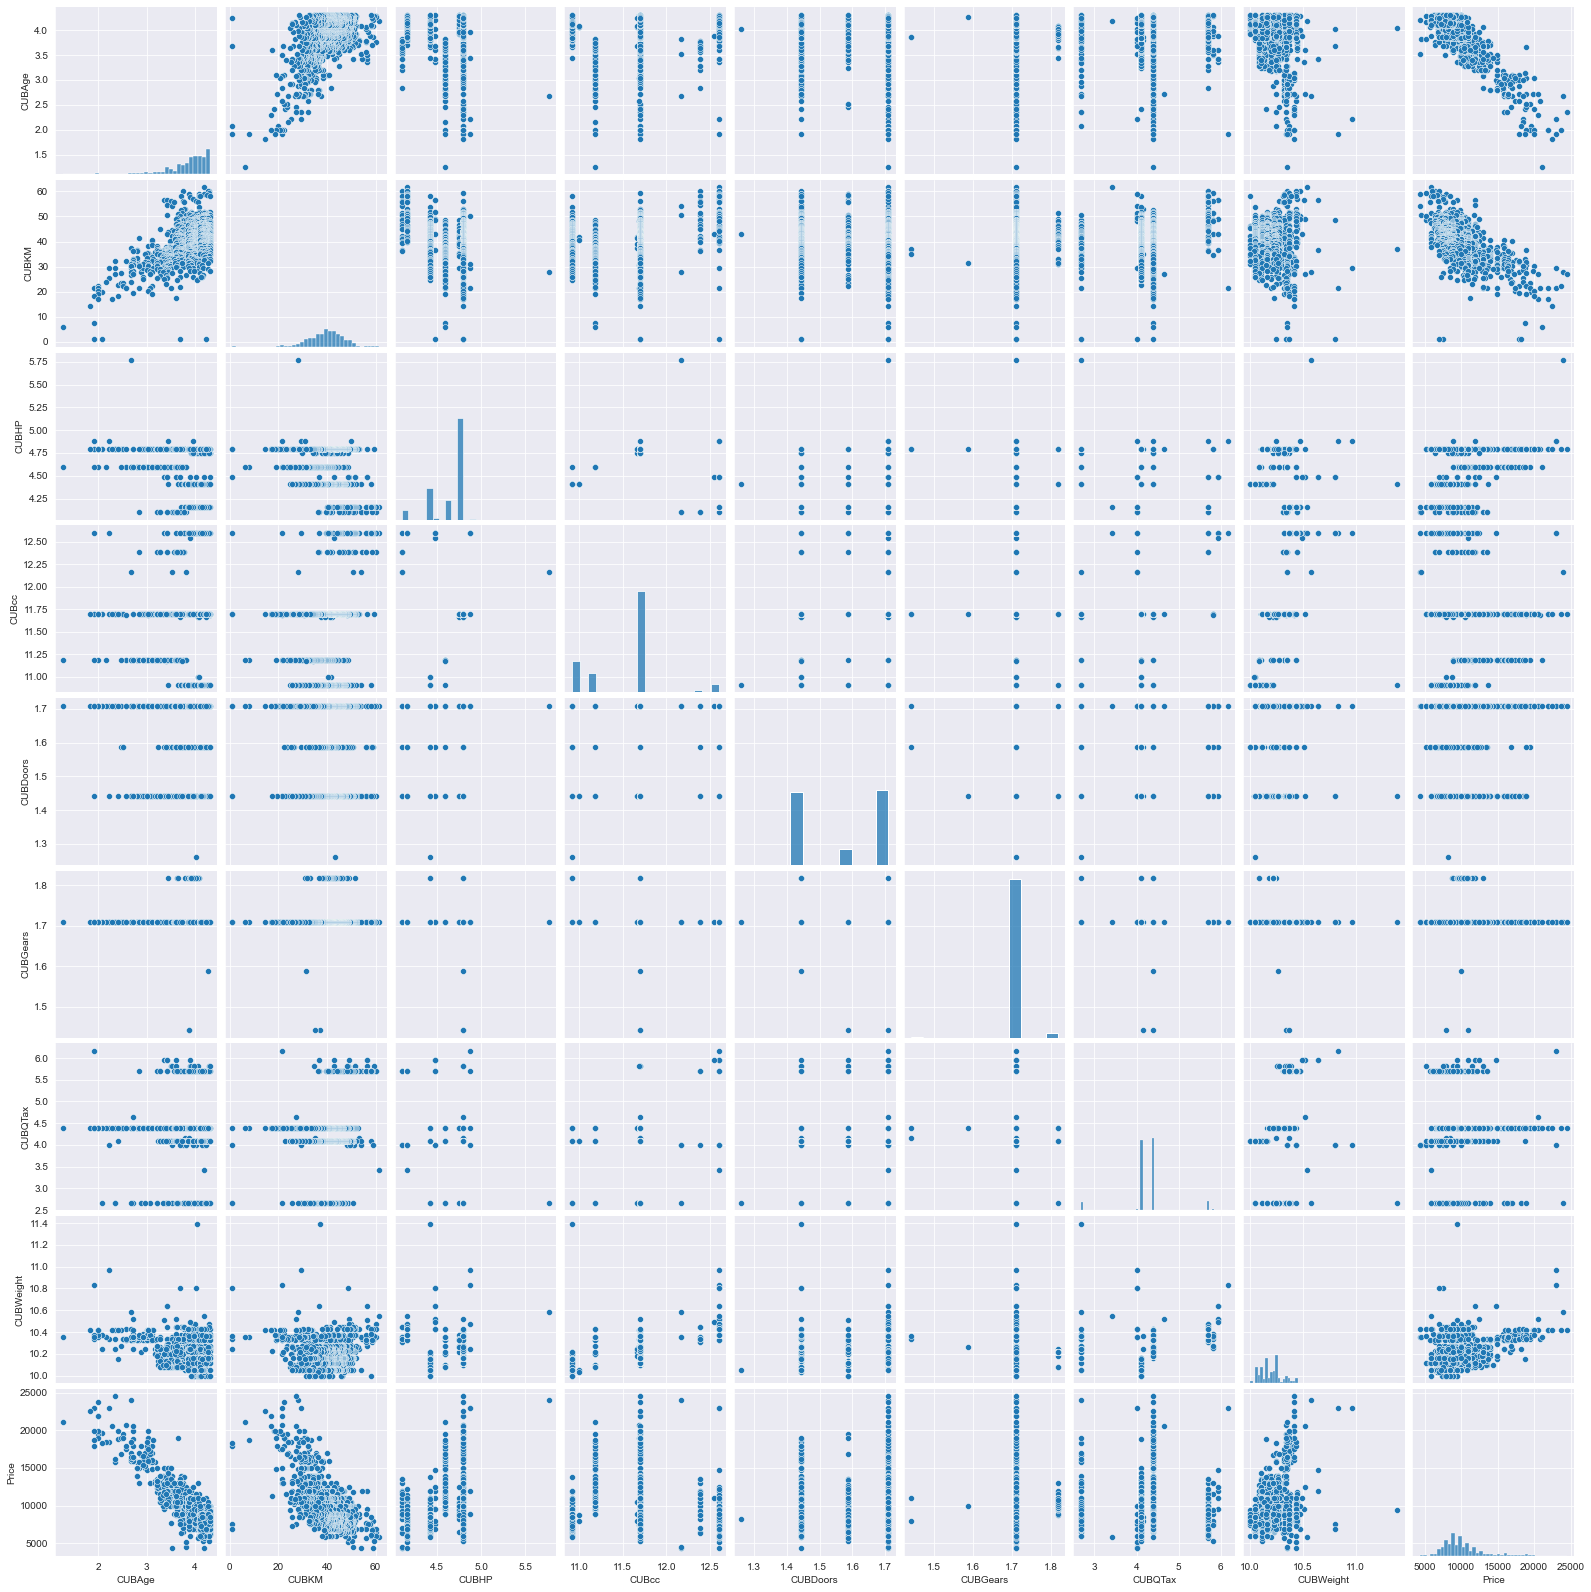

In [340]:
sns.set_style(style='darkgrid')
sns.pairplot(corolla_6)

###  Correlation Matrix:

In [341]:
corolla_6.corr()

,CUBAge,CUBKM,CUBHP,CUBcc,CUBDoors,CUBGears,CUBQTax,CUBWeight,Price
CUBAge,1.000000,0.606846,-0.102991,-0.028430,-0.127373,0.026155,-0.060950,-0.379261,-0.888450
CUBKM,0.606846,1.000000,-0.237375,0.232403,-0.044070,0.042818,0.219466,-0.057038,-0.639144
CUBHP,-0.102991,-0.237375,1.000000,0.162650,0.129230,0.062713,-0.299300,0.047917,0.240364
CUBcc,-0.028430,0.232403,0.162650,1.000000,0.151652,0.025794,0.488585,0.648220,0.040445
CUBDoors,-0.127373,-0.044070,0.129230,0.151652,1.000000,-0.147212,0.124235,0.387545,0.183769
CUBGears,0.026155,0.042818,0.062713,0.025794,-0.147212,1.000000,0.013994,-0.029718,0.013089
CUBQTax,-0.060950,0.219466,-0.299300,0.488585,0.124235,0.013994,1.000000,0.385923,0.037898
CUBWeight,-0.379261,-0.057038,0.047917,0.648220,0.387545,-0.029718,0.385923,1.000000,0.411195
Price,-0.888450,-0.639144,0.240364,0.040445,0.183769,0.013089,0.037898,0.411195,1.000000


###  Heatmap:

<AxesSubplot:>

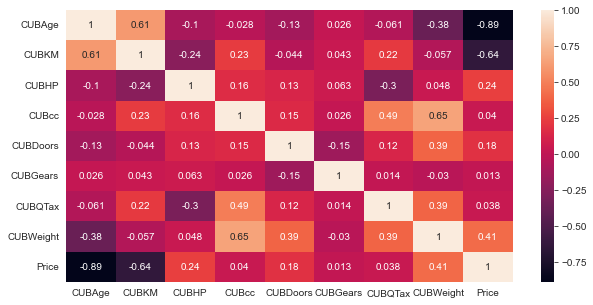

In [342]:
plt.figure(figsize=(10,5))
sns.heatmap(corolla_6.corr(),annot=True)

###  Model Building ||  Model Training

###  Using Statsmodel:

In [343]:
corolla_6.head(2)

,CUBAge,CUBKM,CUBHP,CUBcc,CUBDoors,CUBGears,CUBQTax,CUBWeight,Price
0,2.843867,41.434988,4.101566,12.385623,1.44225,1.709976,5.698019,10.338418,12950
1,2.884499,27.899298,4.791420,11.696071,1.44225,1.709976,4.396830,10.338418,17950


###  Models:

In [344]:
model12=smf.ols(formula='Price~CUBAge+CUBKM+CUBHP+CUBcc+CUBDoors+CUBGears+CUBQTax+CUBWeight', data=corolla_6).fit()

In [345]:
model13=smf.ols(formula='Price~CUBAge+CUBKM+CUBHP+CUBcc+CUBDoors+CUBGears+CUBQTax', data=corolla_6).fit()

In [346]:
model14=smf.ols(formula='Price~CUBAge+CUBHP+CUBcc+CUBDoors+CUBGears+CUBQTax+CUBWeight', data=corolla_6).fit()

In [347]:
model15=smf.ols(formula='Price~CUBAge+CUBKM+CUBHP+CUBcc+CUBGears+CUBQTax+CUBWeight', data=corolla_6).fit()

In [348]:
model16=smf.ols(formula='Price~CUBAge+CUBKM+CUBHP+CUBcc', data=corolla_6).fit()

In [349]:
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     811.3
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:20:22   Log-Likelihood:                -10621.
No. Observations:                1253   AIC:                         2.126e+04
Df Residuals:                    1244   BIC:                         2.131e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.428e+04   4872.885     -4.983      0.000   -3.38e+04   -1.47e+04
CUBAge     -4675.2641    104.877    -44.578      0.000   -4881.020   -4469.508
CUBKM        -55.7243      6.172     -9.028      0.000     -67.833     -43.615
CUBHP       2258.0225    197.832     11.414      0.000    1869.900    2646.144
CUBcc       -786.4663    128.900     -6.101      0.000   -1039.351    -533.581
CUBDoors     357.6722    293.239      1.220      0.223    -217.626     932.971
CUBGears    5241.3747   1612.279      3.251      0.001    2078.289    8404.460
CUBQTax      322.5264     78.430      4.112      0.000     168.657     476.396
CUBWeight   4142.6898    459.745      9.011      0.000    3240.728    5044.651
==============================================================================
Omnibus:                      110.229   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.235
Skew:                           0.126   Prob(JB):                    8.49e-138
Kurtosis:                       6.468   Cond. No.                     6.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [350]:
model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     926.6
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:20:22   Log-Likelihood:                -10621.
No. Observations:                1253   AIC:                         2.126e+04
Df Residuals:                    1245   BIC:                         2.130e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.534e+04   4795.913     -5.283      0.000   -3.47e+04   -1.59e+04
CUBAge     -4666.2912    104.640    -44.594      0.000   -4871.581   -4461.002
CUBKM        -55.4956      6.171     -8.994      0.000     -67.601     -43.390
CUBHP       2307.1114    193.733     11.909      0.000    1927.031    2687.191
CUBcc       -820.1386    125.933     -6.512      0.000   -1067.204    -573.073
CUBGears    4931.1081   1592.397      3.097      0.002    1807.030    8055.187
CUBQTax      332.7980     77.992      4.267      0.000     179.788     485.808
CUBWeight   4360.9319    423.581     10.295      0.000    3529.920    5191.944
==============================================================================
Omnibus:                      110.453   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              645.220
Skew:                           0.108   Prob(JB):                    7.80e-141
Kurtosis:                       6.509   Cond. No.                     6.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [351]:
print('R2 Score    : ',round(model12.rsquared,4))
print('Adj.R2 Score: ',round(model12.rsquared_adj,4))
print('AIC Value   : ',round(model12.aic,4))
print('BIC Value   : ',round(model12.bic,4))

R2 Score    :  0.8392
Adj.R2 Score:  0.8381
AIC Value   :  21259.3058
BIC Value   :  21305.5054


In [352]:
print('R2 Score    : ',round(model13.rsquared,4))
print('Adj.R2 Score: ',round(model13.rsquared_adj,4))
print('AIC Value   : ',round(model13.aic,4))
print('BIC Value   : ',round(model13.bic,4))

R2 Score    :  0.8287
Adj.R2 Score:  0.8277
AIC Value   :  21336.5302
BIC Value   :  21377.5966


In [353]:
print('R2 Score    : ',round(model14.rsquared,4))
print('Adj.R2 Score: ',round(model14.rsquared_adj,4))
print('AIC Value   : ',round(model14.aic,4))
print('BIC Value   : ',round(model14.bic,4))

R2 Score    :  0.8286
Adj.R2 Score:  0.8277
AIC Value   :  21336.8279
BIC Value   :  21377.8942


In [354]:
print('R2 Score    : ',round(model15.rsquared,4))
print('Adj.R2 Score: ',round(model15.rsquared_adj,4))
print('AIC Value   : ',round(model15.aic,4))
print('BIC Value   : ',round(model15.bic,4))

R2 Score    :  0.839
Adj.R2 Score:  0.8381
AIC Value   :  21258.8034
BIC Value   :  21299.8697


###  For Cuberoot transform :


###   -> Model 15  has good performance


##  5. Robust Scaler Transform:

In [355]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [356]:
corolla_7=corolla.copy()

In [357]:
corolla_7.head(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12950,23,71138,69,1900,3,5,185,1105
1,17950,24,21716,110,1600,3,5,85,1105


###  Data Preprocessing:

In [358]:
x_r=corolla_7.iloc[:,1:]

In [359]:
x_r.head(2)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,71138,69,1900,3,5,185,1105
1,24,21716,110,1600,3,5,85,1105


In [360]:
y_r=corolla_7[["Price"]]

#### Robust transform:

In [361]:
robust_scaler=RobustScaler()

In [362]:
x_scaled=robust_scaler.fit_transform(x_r)

In [363]:
x_scaled.shape,y_r.shape

((1253, 8), (1253, 1))

####  Data preparation:

###  Train_test_split

In [364]:
x_r_train,x_r_test,y_r_train,y_r_test = train_test_split(x_scaled,y_r,test_size=0.30,random_state=None)

In [365]:
x_r_train.shape,y_r_train.shape

((877, 8), (877, 1))

In [366]:
x_r_test.shape,y_r_test.shape

((376, 8), (376, 1))

###  Model Building|| Model Training:

In [367]:
model17=LinearRegression()

In [368]:
model17.fit(x_r_train,y_r_train)

LinearRegression()

In [369]:
y_r_train_pred=model17.predict(x_r_train)

###  Evaluation: For  Training data

In [370]:
print("Rsquare value:",r2_score(y_r_train,y_r_train_pred))

Rsquare value: 0.8325078403337629


###  Predicting for test data

In [371]:
y_r_test_pred=model17.predict(x_r_test)

###  Evaluation :for  Test data

In [372]:
print("Rsquare value:",r2_score(y_r_test,y_r_test_pred))

Rsquare value: 0.8127367619370927


## Model Selection:

###  Best model:

###  From the above all transformation    Model10           is the best fit model

###  Summary

In [373]:
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     948.4
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:20:23   Log-Likelihood:                -10609.
No. Observations:                1253   AIC:                         2.123e+04
Df Residuals:                    1245   BIC:                         2.128e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.408e+04   3144.458     -4.479      0.000   -2.03e+04   -7913.842
SqrtAge    -1650.1743     36.569    -45.125      0.000   -1721.918   -1578.431
SqrtKM        -7.1319      0.670    -10.641      0.000      -8.447      -5.817
SqrtHP       697.8822     61.496     11.348      0.000     577.234     818.530
Sqrtcc      -161.9075     24.894     -6.504      0.000    -210.745    -113.070
SqrtGears   2503.3311    804.131      3.113      0.002     925.729    4080.933
SqrtQTax     111.9699     26.192      4.275      0.000      60.585     163.355
SqrtWeight   959.6454     86.429     11.103      0.000     790.083    1129.207
==============================================================================
Omnibus:                      108.328   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              604.025
Skew:                           0.131   Prob(JB):                    6.88e-132
Kurtosis:                       6.391   Cond. No.                     2.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [374]:
corolla_4.head()

,SqrtAge,SqrtKM,SqrtHP,Sqrtcc,SqrtDoors,SqrtGears,SqrtQTax,SqrtWeight,Price
0,4.795832,266.717079,8.306624,43.588989,1.732051,2.236068,13.601471,33.241540,12950
1,4.898979,147.363496,10.488088,40.000000,1.732051,2.236068,9.219544,33.241540,17950
2,4.898979,159.884333,10.488088,40.000000,1.732051,2.236068,4.358899,32.634338,16750
3,5.477226,253.690757,10.488088,40.000000,1.732051,2.236068,9.219544,33.241540,16950
4,5.477226,260.115359,10.488088,40.000000,1.732051,2.236068,9.219544,33.241540,15950


###  Prediction for input values:

In [375]:
testing_x=corolla_4.drop(columns=["Price","SqrtDoors"],axis=1)

In [376]:
testing_x.head(2)

,SqrtAge,SqrtKM,SqrtHP,Sqrtcc,SqrtGears,SqrtQTax,SqrtWeight
0,4.795832,266.717079,8.306624,43.588989,2.236068,13.601471,33.24154
1,4.898979,147.363496,10.488088,40.000000,2.236068,9.219544,33.24154


In [377]:
testing_y=corolla_4["Price"]

#### predicted value

In [378]:
testing_y_pred=model10.predict(testing_x)

In [379]:
testing_y_pred

0       13861.300206
1       16155.152862
2       14938.910477
3       14442.629811
4       14396.810139
            ...     
1248     9073.117467
1249     8667.226088
1250     8817.544684
1251     8918.549454
1252    10482.688455
Length: 1253, dtype: float64

###  Model performance:

In [380]:
print('R2 Score    : ',round(model10.rsquared,4))
print('Adj.R2 Score: ',round(model10.rsquared_adj,4))
print('AIC Value   : ',round(model10.aic,4))
print('BIC Value   : ',round(model10.bic,4))

R2 Score    :  0.8421
Adj.R2 Score:  0.8412
AIC Value   :  21234.3626
BIC Value   :  21275.4289


###  Model 10 is best model for prediction

###  =========================================================================